**自定义tensorflow里conv2d类似的卷积函数**

手写一个跟tensorflow里面的conv2d类似的卷积函数。

In [1]:
# 声明一些用到的库
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
from io import BytesIO
from PIL import Image
import base64
import math

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


读入图片，因为没想到怎么把文件跟ipynb放到一起，所以这里只能将图片base64化为一个字符串直接放到这里。


(350, 500, 3)


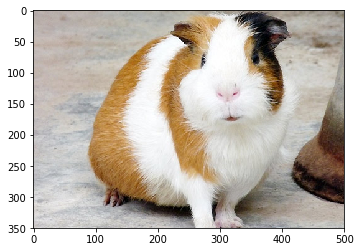

In [2]:
img_b = b'/9j/4AAQSkZJRgABAgAAZABkAAD/2wBDAAQDAwMDAwQDAwQGBAMEBgcFBAQFBwgHBwcHBwgLCAkJCQkICwsMDAwMDAsNDQ4ODQ0SEhISEhQUFBQUFBQUFBT/2wBDAQUFBQgICBALCxAUDg4OFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAFeAfQDAREAAhEBAxEB/8QAHQAAAQUBAQEBAAAAAAAAAAAABAIDBQYHAQAICf/EAEQQAAIBAwIEBAMGBAQGAQQCAwECAwAEERIhBRMxQQYiUWEycYEHFCNCkaEVUrHRM2LB4QgkcpLw8YIWNEOiU2MXNbL/xAAaAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUG/8QAJhEBAQACAwEBAAICAwEBAQAAAAECEQMSIQQxE0EFIhRRYXEykf/aAAwDAQACEQMRAD8A1kOoJUjfp/pWboE/gkYbHscUtA08S68oc4/c0oZaxjGMb42FMtvFSPhwQtI9kHQH3UAnYGikWiRNhUbDeneiQHPuxJwTnPelYeyo4VU6SAe+achbd+7IWJA69c0aLbmiMOV0jYdSKWgFkgD5AUAetFp9jaWzxkvqxjoPelILkfdFYLr2JGDV6T2PCCHAHTAxTkRciglugIAGT8qaducqLy77DqR6+tKnK9IiLJkdhvmgrQ88qyAKhzg9R2pWBwzRqQmMjG7USFaSyW5JIH+lV1GyxFHgZUYG4pdB2cZdRCKNIPpU3A+xIRAwCrk/mJqbirsKJjZRlQMb/pTmJWgL90XSwx6Yo6jZp7Y3CZR8j50rhtXZ2PhYeMrMQT01EUdB/ITHwuOBvUDYf70up9hpsIHClTh6Wi7FR8PiyVlGSe+aWtDsJMVvax6EUENsfrRcoqWmmhglUKnlHcVndHAE/CtW0SjB6N2peRcoN4DbAQkHW3YfKrno2l+F8GvpkM0MUgPQ+R8dM9h7iqxiMqPPAZJonM9kJcfFPa5Dpnuy4z07shFa9We6i/8A6f4hFIwjPNsxjz488eezoMn5EZBFT0PsH4p4Y40ix3tpEb2yk+Ge2HMCsPyuFyVPpnr60Xjp48iMt7G/kcqkDGVNyMbr889B86z6VdziS/ht/bJGxRis5/DIXAcdig+Jh6HG/ar/AI6X8iucfvIuEXa2+Eu+NSnlcP4exwjXGAzGZzgaIUId1zvkAkCnMdFcme+JvtA8L+Hbpn45xscV4o6mWePh5EqK2d1BTCZ/6mG+22MUXj2JYpE32/8AC4pHmtrOaKzI0JEJFBcAnGSAMZ6Hf9aP4lXKCJv+IXw6rM1pwu6uHADLc3hjhXOnOlIYi+lAfzmTPtVzgtTc4as/tzsrkCd0uGviAGQ8u3tQSfysTIdu5Zfp6H/HpfyRc+FfaivEZI4LKOSSaXZVhVnTYfztpLemQvvSy+exczW+w4peTt/zZ5TDfSyMp37anxvWVmvD7JgXJYDrjpqP+1JW0jaLnzM360tg3eQ2L4LkE5+VPaP7MMtqkYEG/wAqUVoE84EyHVoUdfemC7xmuCotmOoDf/wUqV0etbad2TUToHxb1UqdkX1lcTtog3H5mHSiwbNW3BLi21c59juaNDYlIbWNSisC465NVBXYUVjl/hGP2qiM3cEEmQoYD2/aop7QnFeHqtu00WWlG4B3qbjoSheFBxHzLxRGe2KUgt2N/jVhr+76jj4c+/zqtwurR+WrHJGD61ttTxjyMZ60WjRPJJwSe2w77VJ7eVmQhSMjqfYUHYeUtnONutCdI3id393B0jffHellV4wNw+9dmy3VR9aMNjOJ2G9Eg06cdzV1mXI+RsfelsG/vaghe52H/hpShxizNt1HUVWxpwqwySNzS2RaRaj1wO9Gy068Khgeo9KOxadMcjHXp8vb1p7LRsxglid6WwegWPQAPMRT2WjjQAgmToaXYdQz2sKHc6FbcinMisdYW4QAYPbNOJcFsGUODgdzVh0ISc7Y9+v6U5SOLy0ySR86mh4rE6llI+VLSjDrICANw3U0iC3EEbHDNqA696ZuW6rGxWPPXr2pUCSJAcZzjY0hoVEqMm437ils9FxwoH1KKWwJWIM4JXIqLZF4wmaLR8CBh+mK4uXkdWGCOd8S5j8rZxhhlT/vXn8n0ZR14cMrpvFWTS6kORmRB3A9MVj/AMy7az5pTvLiVeeumWHOpQ2+D6exFVfts9TfmGWXiaSxcPy8g9ck9E3yCPY1fH/lbKV+LacsvHVu04juEyHXIkyMZ7ZHoeldWH+Wwt1WWfwXXiyWXGuD3cqRo66nUcvPVW/lr0uP6sMvyuLP5sombI8PmEi8iMSSApcAKvnxsQxx5vrXXMtua42FS8N4cs7zm2j5ki5kbSMtj19fSq8Ttj324fa1J4B4QsfDuGyXnELtJMXIQFIiqeTUSDjJYD2qMs1447fIf2sS+MZr2Xh/iG/HCJZ7CO78QFU/Cs7Gd/NHId3lkmOnMeotI7ogOjao77q+vjB5ppOK8QlisbdrfgsL8pNWDoUbLzXHlMh2JAOPTaujGbjHK6o9uEc2z4eqAyXTOzSRoCdEOFwxH/Vnr3rWYJ7Q1c8MEJj+/sItZyyN8QBOxYgfWrmhSjPbW8kSROG5ZKgSdFB6bdBUZVUizcI4m8LIybTHqV2BztuB7bVjlutJdLzwnxrxC0dJIuJ8oA+ZZJI3QlTk5SQFQP39Kxy4vdq77Xjw59snD4DKnGvu0scekYtmRJCzEY/Np3z09ajo0mmo8L8W+GOOxRpwTiEf3uTGLabTHLknAGCcHfpg1OWA2nF4VJLGecmG7mo0LTKcKjikALZB2x1pyDYuXw5a3GJdJJ67U+pWjYeC2aRYVCGHrTk8RstbKLSQRgDuKUh7NxWSISkZq6Nm5uGyuSD5getSSOHCrdZCqDzA96Wj34PhsYc6SuG9qchbdurVIY9KpknfNVobRcnDYymXYam7CiQ7UVceHXGXJyh/L/6pZYbKVF//AE0fvGcDrqxWX8V2vt40qaPSNQHlrYyI8Dynv0yKDLZlQbd+vyp6EJR1bcjI67/6UjsLD9wKekmpoUlxqGT70aGzIs442yqj0yKf4XY5pAzjoetKh0KzKNXcdaNB1LcI+vO3TepM4oZHGNgeu1IHnYHAIyOrYpjRAfSSceX9KCdzkiRjgAZGakFLMz5OPL1HypgOkqGQxkGgaOrIsbhY+/U0JP5yQSdu/wD6pFs3dLGAGbf2FApMMCyg4HlHTNaSpuIhIXGFX5YpzItHGtSwXUMADc0WloHc8PknwEfSB2FEyPRUNgqJpLbDr/vVbLRDogyur5ClSNR2HXByW71QEw2gRvONu9KmflRIx+GMmpNF8T45YcGg5t/PHAWBMSOcM2OukVGV/wC14Y2qRf8A2vcJtpRGt7FDACGLCJmkZTt1c4Az1wM1lbL+VvjwU6n2teGZJGhi49GS4yNCMW9DgtgD/qxWeUq5xjuH+L7aaL71BM89ozENOrh+W2MgNvt7iuLkwrfCaH/xdb4ryH5xjH4gPXPXuMHb/wB15vJ668YIsr224iJGibD25MbKfiSQfkYHcE9vWsusbypW0ErMZYBqtHAFxGQMo+OuDvj1FRlidR9zayk/h5OvLKOhJGxx/auTPja4gbWLn6dPkcZ23GwGc/oKzkq9rv4M4Fc37xXDhjFKzqsqkDSkYILfMt5RX0P+N+bK4y15X18snjWuEcIjsYVDEySgAO56k+u9fRY4ajx8stpCe2U5BG5HXtvVxmznxd9nXC/GKWMfEkMkVvdx3PxFNRhnEqqxBHlDLuDsVyCN6V0qV8mfbt4Tj4xLxXjF407cH4hx5OI8SeIcue86W1haRuQOXFHH+JI7kkErgGQoBh2m2/8ASlf/AOGp+H8LTjv2g8OuIZbsyJ4a8EcPQ2zwW7MOXdXJDL93XG/4rCZy2ptJFaXmmMZ/x96X4ms+G8K4VssVnwuxVBbnUsFrGoQlyMjVJ5s9FLO37nF9NzuoM+KYz1hXHbS/a7a8aGax4UCeXNxALbM+dwI42wxBzthelds256rv3tYQ7CXmzbgkDy5+Z9KmnMjb8avDA0EAJncYklX+XPUVG6exnhvgScReV7pyYUGXHb9T1x7VNypyRK8R8MucPYI0yoMppyOnUml/60l0hYbni9jOqw3M8c0ZzEVZlK42IA9/Ss/0br6Q+w77YPFR43w3w34jun4hwXiUws455xl7eZwQgD7HBchdJ66vai8aplK+s4rWBGDSDzdAOlR1K2jhyRGNAAJ61Wk0llUjOBj1pUBzcwQ5ATV7/Oj8Omi0Pxrs56bdKnIQ007oCSDvnaiQw0a2xkErfETk7frQej/Pt8s6kEjtTgsR8tzJMSu2n3oEhvkoN3kz6Y2pHoicpIpRJM4HajZaAfcZdWvfGPU/OnqhcnKZwP0NVIowTgbge+KRm2fA8y7dKYMPpPw7H5UaGz8JyDkEt69arSbXGibGSdvWlS2VGrEYHT9c0hKfSGMjf64okPbjQr1Gw/KaZbLFtjA9fQ0tDZItXdj6Z2/tS0NnPu6BfMckHel1PZX3dSpZRk42/vR1GzHLONL/ALU5ii5EyJIVHLAAX9KVgmRHIDHUfi70piO1ee1KkMAdI61ehsmPmM5wcJnv/SpuKdnBGJVI15x2omJ7PROkR0sMAf1qtDs6JU15STGaWtDZ5JX7nUKVhbOIwOdsH0o6ns1IrgnAzntTBpoUkGlhg/1otGjsUGk4BwBS7FoToQpjHai5HouG3QrnR9T1olGnzJ/xCXvEH8Tz2VrOYY4IreJY0GWJaMSkg4Hd9tzvWPLp2/NGDNwW4mhxLL+LKdbhmJJb1b+9cveR6WnbTgV7ZzCRkkEUjZwPK64x50zscZ7dqxz+mbLovvhfhPGODXK8Rg4hdT8Hn1GcWwNwseQPPJbhw/lx5jpby7e9Ryc8s8PTVeHXN/A1te2tzDFNBhhIrOI8Z+Eo+CEb0bp7152VjSLHw7jsPGuIBr22HDPE0XkueW2be6j/ACaDnPmHmUNurbZNYW1pMf8A+L1wm8IuNcwaVJBksmxHcMR7HtWnHnu+ll+JLjfCj90R86YxLrikGcDO4z3BHpVcnBbNow5fdJPhvhz+KJdNDheJRIFljyMMJAAsgI65HX3rs+X4pnN/2w5/p61qvA+Dx8PsoLSJV0xpjIAXJJLE49ya93h4phjqPH5eS5XaeWPSDjvXRGLzDUuSN/SmUR01viBo1OC2vcDffNKzZqWfDdnaXZvltkn4ohH3AOoK2wCgalByA/fV1HbFY9dNZl4ovG/szHiS6e549eSjh580iRsyPPqPmDSA6xtsNHm/lYGsLx2338bTlkjMPtB8OW8lzcxeEOAleIQZCcRu1XKYTKi1UyAQBcBUOlW9M5zXTxSYuflytfKHi77OFsrlr7xLxSw4YYkY3SGWe9vm0KMOY41AGSQMyOp+ddFzkZzjtjIL57F5uXw9bmWEZPMnVEL/APxRmCj/AOR+dL2ps0atmlMyRJy0jLDEakZOex71dg01jwlHbcS5dnFdGORhiWEW5k29cgqNh6VPVt11G78F8NcCl4ItvxFGScLkSyx4DY6ty0fOCNvOavptmpfiXwDwS0P3uxsBIASRKSXR89Q3MyoJ/wAuBUdZKe6ieHRpw6/+8w2g4ZdWZjulaMExO0LBwZVJOVGPy7jr0os8H5X2WbhdZljIaNvMhB1AhhkEH0I3FctvrQkTGSQOZMAdacqakEvI3TSxyPX1otLRmW4T8q7iouTTQM3CBgdW9SrRZ5bKSWBJ6DqKrZaAziTViPYEVJxH/dLgSs6sTnqd9qZgeIWt/KRHbylD6j+9GqNw5FYXqRKs8hOcaidzR1otgj+HNbskgk1A/OqkTsV97/8AxcvbpnHensaWARjVkk77npV7BM8Tlfw+vpU6URHzwuJAMii7Px1Y991604VFQIFOll8voaraLDkoiZSpG/b9KVPRqGCJQTqpDRzlxqQM7f3p7LQebQkiKXG5wB60rR1PbrsvWjZ6cYyp069hQWg73PIUvJknO9BG1vTKQEOD0AxTK0tjJnantJP3jOQeg6UaBEk2FzqA9j6UdSldkvG5YGcip0dpu3mTOg7hqdSfRYIiwBIY7mg9lSlGGkHzetK7Bu2gdj5vkDU+mIOUOk7D3omQ06juG65HpVWloYjrJ0+I1H6opoUO52o0e47GIgueuKkOgqBqJAB6ZNK3StK34t4nxmHg0rcBkdZdQ51xbhJZo01bFI2VtWehxuB+tZZ8lk8jTDj3fXzP4ku+HcX4nLxC7vluuI3D8ySS4lZSxA0+TGwCgYx0rzeXmz929Pgwk/AkHDIpJVjlhhFsG8zKyMVOP5SGzXF/NlXVpMJwjh0TJDZvJEI/OYmUTQnvjTISR8xis8stHJU1Y8PtZJkFpai3ukGeZayo6s3/AEvupHbJx2qJyqs0sdpZcedBzOLLPChx92ubQaVBHXmRa3AxscPj+lTbaV1/0mrLgV1aXkJm4ctpaD8ReI2F4JI/xDko0cqhgO/TY1fWiZrbw21vLe8R7ybVcQAJNchBGX1+UEqCV3yOnenhjZkWWXjRrBopQLWdFljcBZEcDSyj+h9D0r1uCzLyvP5bZ6uXh/g8FkgkgQgBSkDn4uUSDoOd9iOnavW4eOYzyPP5eS2rLGAMY6r+9bxgdyQCSPkKASd1GPhpgyTq7Y3zk0AHLbq2CUGnOSAPiPUA1Nho+5shMGMoztuo2A2xjNGhKy3x3w2e/intLXiEfDIAGSedVLhARgEgYLtjbSOvvWOeWmmMtfIX2lfZx4VsrMW3EuOPwaeVvvVzxTjUameVSzIDa8KtC0+k7fEO/wAWKOPd9PO6fPfGOF+ErGZ7bhXGr7jzEEwleGiyjPqSss7yEHsNIrsnkc+U2gJoeG2gAjl/Hf4/hYqD+Xy7CiHNLJ4Q8RLw29zeQpegDTHrcxLGx/lOwPpvn2p26Vbb43Dwv428I3NubdeKyWfEg2ZLdApDHv8AiFSpxjHX39aX80jTD58ql+IeIOA3MjOnGWllTAWCV9wW9gGXzEdhWWXNGn/Hyivvcm6VoBDm0ckm5UHSpG3mXSAOnUfXaj+RnnxVtHgLxdG3AYeD304efhYW25jIyvyB/g5zsxVQUyD0UVjlY0x4/Fli4/AZSmPID17fOsf5BONKR8TjmAMbbdqrZXEzdcYaFCQhcjOQN8UtHoNFxOOc6jEysOmc0wS3F2ScQ6Tjt327Vn29VpI2/ELZiFkOHPTNbY2IqQkmhhj2xg1bO7Dw3ttLsACw/emMo9PcWyxkyDYd/SrsRLUbK6XQ8jHT6D2qVbpfLk041HOOlLQ2uOhTtnAPep2204YkX4jj3p7LTvKQnGTjtRs7ChEqAt1o2RtlPVTtjoKLRoFO8qbAE+n+9TclSGI3nRgcEj/els9HnuSzhVBDdz6UtnY86q7hiM43FLaToc41Z3zThV6RZ3BKsMdc+1aSopnTzX5WMkbk00nXtGWP8EYJ6+9BeIuduKlwkK4UnDN7fWp/tXh+X74oA05J+L0zTtTSEhZsySArj8oqpkmwWgjK6Cv1NPsWj8UCHzMMY2pW7PRUiQhwSOvpSoOi1XKlRlcdMUdj0JEJQFkx7ZpdhoNMk0m+BUi7OKirH5l81XuDRGqNULu2hai5yHMLQd5xi0tlASUFuuCSM49B3rm5Ppwjow+a3+gQ4zLMf+Simu3P/wCK2XWT7eUE/TFcuX22/wD5m3TPlk/U5way8RX9xGreHiq9Gn4hPDGFUjOWUgyH5KlacX8ud9xTlOPGfrUOFcDuIEHPdVl/N93yFA7acgGvUw45HBnye+KP42/4dPs38bx3Mt5wtLDi1yxkfiXDo0hlaUnPMk2IkPqHBBpZ8GGX7FYfRlj+Pi37Xvsx8f8A2FcVHPtX4t4FuZBDwzjqKFgd5N1hnRN7efsM+V+qMclRw5/4+f07+L7Zf1SeHeNfCpulluLSThF1sJRPFLLEWH5lKEnf3SvO5fkydmHPF3s/EVhcYW1u/i2V1hMkcijfIYx6Tn2fPyryuX588fdOzDPHJoHheW2aR+VLPDIwB5iagqqMYGAxzpxvk9DXLhyza88WmW1u0tkGEoJ0jMsbHOT/AJSdxmu2W2OXKerHYW33ofd7khzcRoVUjB1x4IGT6/1qsLu6RldLR4YiN/dkMQ5RgJIzsVDKcgj0JGD7716nwTeTi+q6jVeHQGC2SPJZVAAJ649zXvSaeVaN5ed+/UGihxgeX13G+aQeUbHO22QKewSIgCox060xsmUqDv8ACP60yiF4vMLeF21iMKCzFiBpHc52A+dZ53UaYzdfKn2i/aJxq5a7h8KoeHQQ69EsYImcDylw2Mp2wQufevnPp+3LLPU8evwfPJjuvjzxBbcVaeSdY7m64hcyyPcTyu8zOS+xZjnuWOCele38fNvGSvP+nD/ZR+J2N5YSXMQlzdMQJyGBPmGrSSPzY613W7cl8VedQg07LnfykHOO3SjekpDw/Fb3N0i3hkW3j85MXU/rWfJk6uCTfrS+H8D+7lFhtdHOy8QZgX09B0IrjuVtevjljIRfeF76e4W4t4org6Tq03Gh0GemHI647it8JHDz81t8XbwVw/x8t1E/DrMXFjLMsct2ZomFswwC04d8uMHdVViw6U7ZGPetz4b9nt1A8U9m1lFzQovpAsigjILcqNdl6beYVFx2P5dLddcIiGAB02AAA6e/eo/jR3R8Ud7FcGGNPJipmNh3LabtYxHETOMv6Y2rSfhWhrm/VA/LhBIz0G9I4rT+I2SfE0elgcADBNZb9a/0XLeXlwwltwAp3yNz+9XWdFQT3zx5ZyWxjHpVTaafjmnjUFjpf83/AIardBE8txN8UhKD1pel4QblolUpJgehO1LdPxI/fJfun3nmDpjPtT7Fpe1uYyCSdxR2a9XROjj4gQKNl1I+8BThdwO/als5HDdds7Yo2enOcBnJ60tiR5rhTtgHHT3p7PQOWaUMdC7Dv6VNPQGSW6Zhy/KO9RsU+s88aZk79xRaWi47xpAAwyp9KrGlYIZ2OlgTt0Aq5UWOxyaSXHen2LRz77gEN9M0uw6wj78rZ2xjoKNp1HUvYt2ZflRch1NPexs2AM46VPZXU5FcRsRq+P8AlH7VXZFxGxqDqDbDrT7Cw5HLAoClSWHejsWnnu0jYYTc9TSOY7NPxEYKRrknpSqpHY3uZF1N5cfT+tL0WEy39tYwvNdsAq75P+lZ8nNMJurw4bnfFL4j4nnvHZbQFUXJOMHb/wA6V4f0/wCQuV1i9Xh+Pr+oa24D4j4zcKEsnRWJKzXR5abegchiDtuqmuXi+Xm5Lt1Z82HHGxeBvs54vbqk3EbyFIXCkxWjTMGPuzpFn9CK+h+T/H3D9eR9P245fjV7Hg1tZIFjGAMbKoQbew3/AFr1scdPMyy2lEQJtj6iqScKgjJO1IIfxL4b4H4t4FxDw14isYuJcC4rC1txCynyEkjbrhkIZWBAZXUhlYBlIIBoOePzV+3P/ho8VfZf4ndeA2fEOOeAr4j+E8YtI3u7iIsAGtbxIELK6n4ZSoSRd869Sjn5MHVx8v8ATO+HcO454RlC8njEwlOJ4WsJjAhToJGmAAJzkaF1d81ycmGNx907eLPo1rwY/EJDFLYq0V0xIueGySsyOpHlaN3zvt8BOpfevnPq+XHe8XqcXLv9bj4XuJZoFDMecmASygHUD8LAADPbNY8Fy/FcmmhWctvMYnmKxSDbmKCuDnrtqHvXdxTG1xcjQuBcJij4jJxGHDRzxIZGXHllVt9h/MMN88173z8Emfef3Hl8vJb4u8fQDvXfpyF6sNpPpSMoDYigPEbe9AeI/agqGn3wx7UqGY/afxVYbBVL6UlziNPjdh082+lV7t74rzv8hy9MXd8eG6wHjVheyWV5daVVdH4MKjAY5GCQD/XevnN3LJ6+esY+bvtBe6iuJrgn7pGiGC00JqA0rpaQAHGdXwmvd+PjuNeV9GTHuPX0dtAsK6JJmQK2Mll7bt/MQN69y+PO/aqIieZ8RqWJPlA9PrWdprf4e4bHdNbQ644btnxCUAJ1jpuSq5P/AFYqLNt8NT1p8PFeJ2dm1jacKeWeIfjLrgkIJ7hCzFvp0rK8WvXR/NNLv9lH2YcW+043XFPE/PsfDFq0tsIkgayumugqkGIlcFVBOslSOw71cjHLN9G8G8L+HfCvDouF8M4fyYIFADtl5HIGkvI53ZiOpqbIz3sYt5ax6tUDYHtSmUHU5HJaXA5ijSg/m2x61pKmw3Kkb/8A26FmPfoKWxEdcC6jYCTbPYbfvStXArcsF1kOlz0FTvxUUvjCwQyNP3ByGO4rmyvrfHHxEweJLe2TLSnBycd6i8mjvGlR4vsrS2WfJk1bYG+9XOZH8SV4Tx+04nh5G0q2NKnY/pW2PJKi8dS15d2tqgYDWh6AVfeImCHhu5r6fSbbTAPzVn23VzHSa0w8nkaPwsae/wA/nVf0j+2gfcUf5etV0a9nhZ8v5dsUuhbDIhaRo2TGMDPtS6n2OJCmdJGM/wBKOo7Fm0Q7A71XUuxRtUIGOo6YpdSmQaSEqSG39KViuxMNkAuqQ6c5OP6UdR3OfdIwpDHY9BT6Fc3fu8SDyqM48tExTczZBU4f6CqmKez2mLudI7CpsGxa29uUGsjUafQrkaexhVC/1NHQtm1tDKQUH4XalcTmTgtbVHzIcHuKmRWxXIs0TWrgSHpn0opbNpFy3LFiQw60xt6Bj94Ox09M9KQGNCmCdvrVddl2dtraJRlVDH1FHUrUdx3jtlwaI85hzyMpEDgn9OlcX0fVhxT11cHBlnWWX/Ebri10Zmby5J5exjx0A69a+W+r68ufLz8e9xcOOEWHw74Zv+IXKTzSR8KtW2WabdnI/wD44VIJ2916967Ph+LPO7/GP0fRjjG4eDPBnB+FsbxTcX11KAGuLsJoAznCKFHoPiyfevq+D5ceN4PP9GWbRYURBsuB2xXW5aI1Uk6eC6uu1B6NzSLEMj4vQ7UtnIq3iHxfY8BiMvFZfu8WCcRlGkIHXCnfFYcvPMJut+PhyzvjFvGX2sz3CzpwT8K1nAXMh5hdcecvo5ZXPQAFuma8vm/yc1/q9Di+LX6+SvG68Yu+NPxN7mXiVndH/loFe4CwkYGlgrFiNtQGresOHmmbTk4+sXzgHh64urO1v5F+5OAC8UWpY2HoYycb9c9qx55KrhzrafC1nJdWiwzosd7pOiVpE/FCtsr+bJyOjfrWHHxTTXLOrrFw+eCHM0TIVOdXxAfUVtOHJhlybaN4OhlhtmjmJLA4jB/kwMA+uDnFe98mNmPrzOey1blAx6GutjHdJbBpB3oMenSgPF8ZzQNEE4bOeoxigGp/hAGNJ6UBiH2oNM3GI4tIeJYkaIdAPM2r2Jz37CvA/wAtbcpHr/BJ12pV2iJZtl9lA5kj4wTscb+9cHHhq+N+TPb5I+1biltxTir8PTyzxvpZMgElWIAI/MQTvjbNfQ/Lj5uvL52McWtEindr0szjIWI/Gu+cO35a7cs/HLjjpAzzNOOWoWOMHKqvlUD09W6d6MIVqw+HZYDH9zkmWFGA0yldRDDrsenTNRybnrXH2Ns+z/gvE/GvFbOGRYrWzt4RcXc7W7yTyQrKsbNCq6kGsg4eQqM9FbpWdztiusfYvDLnhttaQwWqpZ2sahIbc7FVHRQOtKZJsSssqOgKwM/o7jQP/wBt/wBqnezkMycOlZNXlVT+WIZ//Zv7UHKRbcNtiGUx/i+p3P60bGRElqtvGwVcEd/nRtOno7O0ZBNeqMAZHenBpFXXBk42xSwiwAdyRVXHZy6QPiD7N+J3lsUjZUk7fXascuHa5y1SLj7FvEscnNEkUqdQCD696V+e2LnMZh+yvjUEwfiUiCMbiJf2rP8Ag0f8u0lH4Ke2mWVWIVOwP/gp9FdqslrwiKWEa2yF6irkRRsHCViBeI59B2q4jK6DYn5vL0jRq6YHXPpV6ZbX0CQMRkj37VbQQhcYDHNA2VoViCBg/wBafhbrxSJfjxq9Pepph2ePPkO/pRsV3nJup+Ib0aLRgy4bAGr3+dG9GTJJqB09u9PsV26ELgDpnpSB4xaAupgTjfFOVNgG8fBG++OgqcquQzFa5wS2onuTU7O6FYKr11HtVdqiyHYoxONWrIHUdqctLRcheEFFI8vYe1FIwsiSgGZcEn0pdBs2YhJJqRc42FK4iU7IdKb5z609DejOi5Glo3wM/D1pSDexDmZk858x6Y9aq3SdbQ3E/EcHAYWBm5l4w8qAjC+hP9sV5v3f5DDix/8AXd83x553/wAZjxWd+KTNNJLJLI5LSMNyPkDuAOwr4/6OfLky2+j4OLpiL8P8L4g7tNYWRk2H4s+FSPJG5ZyFJz0HXvXZ8PBll+RHPy4yet68C+DLuLHEOITKZW6qi/r+I4VsE+mn5V9d8nzXHH1899P0zLyNXs7VYVUgaj/McV6GtPPyozO/Tb5U9kdAPXORSDzMundc+tI1X8Q8YtuHwu7EjGTpDgb/APyON/SsObOYxtxcfavnLxr46tr1pI7mJFJYnMZODg6RqPQ/T9q+e+n65l49rg+a4svmu7dpVEitGcMURJPLq7b4JGRXnbldllRV5wH+KK0skTXEY80UjAEK/ZS0LKT/APJTW3z8uM8Y8uG1s8NWFxNZx2fDrhXuLUheV8LKOrDDBfpgfvV8+eO/GWGGl64N99tH0Tq+oMR+KuGAPUE9GHvUcUy7Lzs0t3AvFA4jxY8KtpALy3IilXUcMD+VsfCw6rnrvXvcGF08zlrcuBq33GF3GJAulgeuV2OT3r0+OeODK+pkd/aqLbo26UjewOpoBD5DBR0x1oDmCDqPX0pANMSSuezZzTDKvtKh5MwvCnQJADjfLFmP7CvL+/Hzbu+XL+mU+JrxDwy5SZxE0cZkiPdmUZBIHXBFefxe3bp5PHwt4slL+J7g2mRxEseZcsdSgkklI8D3/wAT16ep93gwtxebyZepFPC/3zg0nEbiKWWcZ1pFh3JAO2O574HWsuW3G6OTcZjxG1jScnXhWyVVwSwAOB5QMb4rr485phnNV60vLbh7pM8TXExwVMvlVcHrpGc59DV308bX09/wtXo4lxnjcc8XLnlSN5eWgCTacgayHDKIwTpCrp83zrm5L63n4+vrGxsIIgVh5Wd9WN/161ETseLUOoGcgetPR7LSI6sA+QUknRFGoJGAaqw9mJlt86WZSx6A1FEBz27TLpUZU7YFL0yiz8LttUI0t6Adx8quWwrIjDxZ5TzHcl/5SD1o2eoXNxbiDRgRgKvr3o7UaiuXU/Fbi5JZNQI8lRbVyI0xXwl5br8W2PnUbaSiv4PxAYETBdW5FVotjo4biyjKSjmSEZOOg/SqxRlpH6PxefqXTn4e+fT/AHrTUYa9XAXGdj17D5VbZ4ynV5Rv86mmWJpAMjvvUjTjzKxwx8w2zStOQE8h15U9Dg0pRYXK4G2Oo3q9loxHN5jthT0qbDLVidQTJ+ewoibTscjMSHGkDYt71RONMQdJyW6ijRU2wmJDBNu+eu9OYl2cyyPmRPIBsBT6wtuxtJKCXBVenSnIi020d3qZoGOkHBFPRdqXC1wjs1wuonb9qNDbr84HyqTkbjGMUA9HbSx4Y6sYzSOC04dLIAZDhTuaWwet4LOPIckgbEe9TlVY4ql428UjhcYteGBWvXBxsWMa+uOmfQH5143+Q+7+Oal9ep8fydru/jH7j7/xKWW7uGkmYnLgEjGe5x1+VfJcvLlyXtX0PHjjhNQbw+GKOT/mMMQQAF6/oCc49zj51r8mGPbdRy26a54PjtJBCrwyoyeaAKoaXqDkFx5AfVdI9M19d8mWOvI8T6pW18J4hYBI0JjjlG/JVw7L89P+texhl48jPFYobhZR5QcdOlabZ2DEB9TjrvQl2V1A3P6UHEXf3ccMTNJcLEgz5pGUL09SRWeeUjTHG1g32j+J7viRfhsTjlwHI5LgocfmXy5OR71879/1XK9Y9r4/n1N1i0ca3JkkMrswbSVZgTqPXJbvXjzKT9enlaZk4CwlcTh4FcaQ6AkNk5AGD5TRlyRKUs4FtikazBZAPNI2FJ+ejG+cdRWE5fR12sdrw1Z9M7jmzdSQwB3wc+9b67e1nlE1eX0/AuCX3GL1TLZWNu88qSHygIucg7EfSvS+OZXORx89kxU7/hu4x4X8W+IeIcd4EnE7e9uC8l/bcQiSWOddRKyW17AxLMmTqimCkqQyDKtX1M4tR4uXJa+17NMRJ3BAOR8qtkOAxUm8BQbhHfuKAS4z5u2NzQHGI0luwHWgBJ0KFQvw0gp3j61W44YxCh7jmCC1Q4P4so0AgHqQCTXP9ePbDTf58tZPmr7ULaTh/B+Iywp95uLEPHywAS6NhXAydtjmvF4ZMc+v9vR5PcfHw/4u4/Bb3D2/D7cQ7lRowSGGxBPUV9Nw5SYPFy32aB9mt0/EfClwnEwwmtp2UyxdkKhldh6DffNcX0zd26uPyKp4l4BLLcycSuzFFFKSlskn4bSBTthQemOrZ67Vhh9GorLi3+KHfcHv4wbpgwjwNMzKVXbppBz26V2Y88rLLjsXD7IvFzeEPFnD+ITyzfw4TIbvkvlkjOzvoJCthc7N17b4NLKbh4X+n6S8MlS8tUubZwUxkPGSA3cHBJIznoaz/Co8TXHLJKHV0FG6RAbiJEfKVQ2ckHvSVofIJ52VpECsBuq1VIBd2wLqRES46mpOH7cJbRnY6upFOCvfe2nUkRhkBwSRmjZaCyvaMSpREA7nH9KNmHNsjxmW3bV2AFTTNJaSAh2jOehPtRo9mZOGEyiUjAO+KOpyk3FpNBGZkJc9ABviijaIupJVtHd1KsTgZPc0YlUTpPI06/Lq6b4zn1rVmuTR916/pR62e5Tr0PTuKXoNMZQSDn2NSo25bB7k0foeWCQkEnI7CjQ3Dgt1BGcmilXpYpAdMCj504kRbxEKF21HdquQqdmhdgmhNWSMnsBRYmiEsoQxd+3pVRFuz628JXbuetK0SPNa26sSdz3p7FhQNvySqgbbAeppWloLGGEwVgBG+6gUpmfUe0EbZwox29aXYdTUSsCQYdqi5qmJ0xSOmWAA9KN0+pcKFgoOw705S6ojxJxThfALVpLhsySfDEm7t6D2+dcf0/Tjxz2ur5/nud8YPxjiF1fXc10QAjsWOMkAdevevivq57yZ27fTcHDMZIj0e4lzHHKTI40qijIOTsNIrn/3v42y1Fx4NwqOzCS3miWTAZY7hkjEbD0UDU36Y9N69P5fnxw/2t9cfLnb+LdwOXid9KsHDZLZsZeR1WQBTgZb8TIPX0NezwcmeXkcPLhjJutm8LWbxwAvKsxHlblRjQpH+fAzXvcGN168Xms34u1ugAB6f+dK6nPSzIqAo2fbHelS0CuZpBEzQkt/0Yz9CdqnK+Lxx9ZB9od9ezRmOO6lstjGwkk/Dk36kgEZ9mrwf8lzXWpdPW+Pin6wLiLmzuhGs33iVif8PYah31ZxvXy+rMv17vlgq3EMjtHME1ygEyuBgtjo4Jxn3rS8m5pnMfXpWv7RuU+VGPwpAwdWXtjfpXLyTKNpMaYsdT3RkdiSD5iB6VOFv9i4rjYw4dZEUDUQTnO/uK6ZthlJo/4+kmsfAHGXPNjFxbm31QFuYpmIRSNPpnUfYV9D/jML2leV9WU0r/8AwvcH8bXnFbfjE9wbnwYqSC2uXSJmiu7eQJJbhgFkUENrVskY2Pofqb+PFtfasHQZGKipP+4pKeNAcZsdBmkDTsHjw3Q+lMEF8BU9v1pbGnnbUFLbnO1MIPi8UVxpaQYSBjKm2RrC4BI9gajObVh5Xzx9pdk33u6t401oUIY7HXIFycnpuf0r53687jzePX4J2wfEvjn7KuO3nje+urK0RxcyfeI7GAMAGbdyBgeXO4x617XyfRhePdedzfPZltsf2IeAn4Twi+u+MFYv4inLht5AVLKWBZiGOrOVA+Q96nn5MT48KM8Z/Z3we4hlnRGluBnkvZI4C428uokZ+leRy8sld/Hj4wLinAYhxCTht1Y3XkGgSyMPi6gkuMA+yit+Lm3Np5MIrPEOAScPlVbeNjbDzF2U4diTtqYAEj2r0OPPbjyxkfbv/DD41j8S+A4OD3/EJrnjfCZXt3S5yxEGxh0yhQGXSdIBYkaa0/tGTb5UNsrSswCAZJ6f7UdWcqucRj4vd3MF1w91WFDkkMQf2yD9RS1V9lks1vNAdzlsDJ/9VUibRE8ZC6iQG7mq6lsItpJISzNqz29am4ntxOHmHUFz5tyPnS6javcbhv4gfu1nzSxwSD/el1VKlvD0Ae1TmDlOesZ9frTkKpiSF4z5sEDfFXotgLuSNSFZSM/pWdPYOSRHjMcR1N0NKqiteIElVIomYBSSxXOPl1qsIWVV/wA33fOo41adO2cfKtP7SvHMcdRnIqbW0xKEjZx2O4o7Cw7yQ66jselAle+7KVHT0Pepgte5EKFcHp13oEj3l1YTp6mkenV5IJDnH+tXNIsdd4BGWiOAfKD7mjZaPWyuiAM+QaVyLQl2/MF+VHYaMXE0yRKYVBbOSvtSGiLadrhvMvLA+IGmQoIgGpVBOetTTrpQawx2NGzKabGMDIHekDX3yQhgQFPYdqmmXbzgAux2J3HWnKAnGeP2vC7KS6fGoDyKTjU3YfWsvo58eObrXi4blWL8X4/Nf3Mkt6HmuGzpTfC5Ix8hXx32fXeTJ9D8/wA8xniMR7eZixkDHGCpOrB64x8683zbt1qCodEK/wDKqItYAklPxnHbynp8q275Sf6s77+rTwO0QRlpYGBkOzvEZGLH557n1C16XzY7/Y5eW6/GleFuITWzraWSy38qlVMFuolEZzgFuWAFHqxOBX0HzZ2eSbeV9GMvtrXLCG7eJfvqgOOysTj67V7eEuvXk53/AKSYwgwQT7Zq2ZiXQ4IYYB7HpSqoiuI292ImaznCnB8jk6T8m6iubkxumvHp8/8A2hPd2vEDbyMy3LKGZFbUmlumxwf1r5P/ACNymWq+h+LGXHbLJkC5M+V3J0sgwcHB8w3rzOOO21I2NvDcOJmiBdBoWRjnUuM4b3HY4oA6NUtxyEtmnhc//b4LKD6qTuGx6U5/82WSTsuERyqz2cUoZSdcU2kSKfpsw+VdF+SWbjO8uv1auDcPuUEemASq3Ro9zn2G+9bcXy2/05uXmx/7TXFvCfEvENnFai3keIzRzSAgqrIjhiDrFfQ/DwXG7eVz8krRfs5+z3hPgLga8F4VbxwxJPNMWjBGvmyMyswYk5CkKflttXtWvMq96e30qacLXUrYO6460lOswyRncdqAQ2dv1oBk5CHfJ3qTNM5+h2oDkrswyu++AKAAu1HLYPjc5I7YFLK+HP1ivjhJbib7xGFihuGduWwAc+hPfoM/M14H+Qlr2PkZzxTgsd6RNOjBIfMnLOCz9AMenqf0rz+LLLH+3Tyccql8V4rxfw9dvHfzxymRS6xKQXUjtuNse1aZfRcrpjOCRBP4qu+IW8gS/CCUlIl86ZON8SKikYPescsrv10Y4TX4yvxTwviM94JS8nOVSsTTJzev8jr1z612/Py47Y8vGzniXB72McycZZTpEgYuoH16V6/FljZ48/kwrX/+GXxBLwPx3a2rShbDi2mxubYhmV2bJj6g6Crbh133x0JrbfrLr/q+90tBeQNDPgxkYwPQ1s5q8Y7Lhlvyo1zpGAvWlYcdguAU0gYPUg1Mp6EGJJ0ztkdauRNod4Zo2yCFC9BRotg5ZpklJBwx9elIFxSzyA5wc9TTOBvuyiXUJmVs5IHSpuKuw+My6Mkg+maBsPc4kGk4JO2aiqiHHDnhlMiSsUb8tTo9qxx9ml4iIk2KgK2rrvWmN0ig/uqc/HNGn+THfFHb01oUEbZyKnTcoZXAjbOe3TFEhCAZMDVVlYdBHUnt9KnqRSqmN+nYUtDbiomMx7H3NB7JaEbs24pAyHRBg4CA7fOjZ6LaaYoBEuST8R7UUjvPKBVZvP2oI1I+rD68P0x6Uj0SJkEmDICerE0tjR+K4TQCr/Onsup0zg/CwOdqm0adDDADNgAdDTlDzhAvXJO5p0T9ByzcpWBJx7HrWNvjXHHdZd4j4sOJ3rYlxbwEiLJ2zvnAPU18p/kPpyzy1/T3Pl4esQqiERO0ky5fYoAqjHqe/WvJ3N7d5CMsmvEUbKNgVVQc9Mavap/VVK8OlSMrb29vruHG6jfY98k/r2rbj3vxllf+2g+F7WO9ljt21X2psG3jfl2w0jfVJjVIRtsmAPWvpvg+fet+vK+vk1+Nx4DYW9nbKtvZW9rsPJaxKufmQBmvpOLjmM8mnh8nJllfViTZdXT16f6VsxJbLHY70AmQxKhMhCgbsWxj96m+KjOvGHjmw4MksUc76lzkIrF2I38ocaSD/Mdq8r7PsmEej8vyXOvnDi3FrrjPE5Z5S5aRi+WOevueu/pXxv0fRlyZ7fR8XFMMdIa5kaVlGDzIJCsqtISpDDdfqMEHNGF8KxN2SNcqPu9tpQDWWVsKq5wxYk4GKvDjuVT20mrW3gUkQ3LNqw7GBRhxnqXPUegArtx45PJ6xyzrWvBXgSKRlvr+1cMMGNJgcKRv0GNz6YNe98XxTW8o8j6vqu9Rq1tZpEoAUfTavYmEjzLnaflgV2G2dO+T/vWiN0WgwFB2b1FIPFsYNIE84ZP/AJ9aSobZyxBzudjiloFF8KNxnOKQNl8Ekbt1FLZmnYldJPTfHvTBsMzKSDjOBj+tOEYuFJUs2Bq6/L+2KWUKX1mPG+FfxLiJuwnNhAPJAyRgnrt2OMn6DpXlfTw9q9Hh5NRCNwKSSYxounl4ku3UErEMHSgwN3bbFc//ABbp03nULj32OyX0k12ZFtLYZaZdTNLJ1JJydCk+urb3rD/gXe5V36oxjiXAeLeFrlVjMHJaRi0cSiRuWchEMmwAx5jjauf6cOv66OK9le4tw294ivMaOK1AIYTrMhjXfB2ckjfpgVxcfLNujr4yjxLY3QkZ2t1FsraHvIcnJzjOF056bbV73y5zTzvowG+CEi4fxCCZNUxRkkFw2fK4dXUqQcbY23rrzyv65scNx+mfDLyC6sobu1zyJkSRNQwcMobBH1rtwy8efyY+jWiSUKzKM57dqq1Mc5SEMwTc+tKQzQQRaVXY981UpFTFThm79aVohvko3nfce43pbBvlJp1xjekrRPJRsiRce/rTGiSiICqt07DepokD8kczmasL6VPVW3pJIwvlGoL3pUM7nf71xG4uCRl5DpHqB0x9Kr+kn9K/eM98ZzjtjrWZptYJ5Dso+daTFufjsiGDORqouIOHT0HbpRDKjC4wvf160rU0guenp0p9tixw3ABGTg+vzrPatFx6XGAcjFMOOVzpONu9IOmRVGQB8/SnstGiVm8wxle9IWOFEAOpuu5HrSoDSRRYA3+fbeo2ZUMEQTKk/WnAejdVyqbkdKAfIVt5DuOgFIac0zSN5AOWKBpVPGd9fW1k8NrHI5mPKd4wScEbgbdPU15328lmOo7flwly9ZkLKYSnmssUgOC8gIOP8pJUV8zzYe7e7jZEjacP4cs3PuSTJ0yrDHTrnYb1zSYxVytEcQuOHRBLazTzHr0P1O4FGVx/oYyneFpfXEggtLV5oy340SL5mx01N8Kg+9bfPLllNM+SyRungTg/FIIPvXEfu1mjtpjtbOMOwVezSLnf5bV9p8WNmM/HgfZnLWnWciAaUYdugyfqTXrSvLqQGSu5ppcVMsc0gFvYWdCo6HoD6+prPOeNMf182/avexQXTW6qplOQZBuTgnue2f3r5D/KW9tPpf8AHzzbJvvE8X+LrSFxqV2BC5Xseh615HHxbehlkNHD45zHxKIjQdKz4Ozg9DvnofWu3+KSbc9zTfDuTetFYyMxjkcKIIFGvJOADqwCSTgZ6mr4p/JZizzvWbbz4Q8AcOtOTeyxyxTp5whkVmJK48x0Dp7V9L8vwYY+vF5/st8adawxQxhY4wu2DjH7mvVxkkebbdiS4RcLgE006LjGwJ6mgzu2CB1pAw7EZIGT3oBhUwTvnfIz29qFFbJgjoDmgOnoT07jPvU2GZyT0I3zSBLqxG579e4zTBLMBkgfCNs9BTKh5kV4yJjlWGNB7/P2p2JiLk4cinKbd26AfX/zpWWXHtpM6Zmt1ih+726jUWLZAAGW6s3vS6H3qM4h4atrqIG/LXgBDpblmVNQ+HUE6DPX2qcuNU5KyPx5wjiE1zK91JAU3fRpaCNAAAND6SdsY3rxvu4bZ69P5eVkPFuFGSOWO5uFdPy8lDMzZ6EFmUGvn5x4416k5N/jJ+O+ErK6eS64ddXcTN5caFVWzvggkjoO46128X2TD+mXLw7/AFWfDMPD7O8ksbqErPkgHmZDHGNYVBvvjb03r1ZzXPGack49bfoV9krw3/2e8Bu5JWkmNuULyHdnV2DEnqdwcnud+mK9X5t3Cb/Xk/RNZ1cGhKxZA6lsVvGJtGUIAw98/wBKNg2yCQnX8PUUg4I4wp6HHrSoDgq4YZwKRx3AVfLjHrQo2wdgNTb+1OAwQI3ydz+tRQHnE5ywxg9FqVSIi/up4LS4kdNJVSFHqaRqVazp96jicbnLyD+XfpV/0lKcz8bGd8dfr6Y9KWvCWJtW2ltJ9KrdbadyMYYkn+YUX0zQOWIDDP5akyyoyN/N0OKVIoxKMZ2+dI3mSJh0yMfvTpmxGFXHRc/71Oie5IfzZOaNGbaGR846dt6RECB40Kk47jHrQCliwACfrT8M3qzkH5CoyMgh2byDcADFG0nUik2IOG/MM7UgWYyW8xznv6Uz27PPHZwO7voUdWJ2Axnes88us2eMtrMOOcS/il40sJ1KDy4CSRhd9wMdT1r5v7PpuV8e18/H1nqOVL+AsrtJ5wRiSQsMdM75/pXlZd9uzwhYUkjbneeVTjKxBRkd+2cVllGuJpLG7uG1ReVQQpmlKjA6bdNh7VE98VtJ2EV3LcRcLW8w87BEdQXBJ6AKdIOe29dnyy5ZzGOfmyklr6C8F+B+GcLC3KW3JvmADzSsS59h5jgfICvt/k+THCf+vmvo+i5XTR7e3WFQFGff/wB16MjionJ/MMU0unRpz0HqanZxE8e4glrZSES8skYLoCxA9QAD0+Vc/LlqNuLHdfL/AI1mtLjikptl1ICxRpFzI+Tucnc718Z9+fbPx9P8k1ioBuGkJhnAKKxC+ViVYjAG23+Wufgxv435KL4dhVkhLOiKXCKqBWRhpJVgRjI69K7Lx3TCZTbQvsp4MOK+JzcTIgseGxmWVugM8hCIo3wSV1H2rt/xXzb5N3+nJ/kObrhqf2+l7SIKi7AAdF/vX1Uj563Y7UqjAyT2AqicRSzaiN+2d6ANCeXY/rS2HMAHT3FMjL537GgB2mA3JAP9aD0Ge4BGld3BwV6Uj0VrJiyeq4JHyqdgLNdaGCgHcA7UjNPxS1t2jWSRUE7iOPJ3Zz0UD12pjR95SxKA4x3qisd0Kza2Go9QM7UJhMqF8ZGcb+lI9hZBHq1MQz/5ego0Ngb2ZoYmkSMsuD5dJOfoMn9qnKqxZf4l8RcPkm+63iSDIJMMlvIi56DDltYz0yFrzPo5sd6sd/Dx2Riviq44PZBZbK0VLjWTJDeXkpAHTKlcZz/mrw+XHin5i9PjyyrNOJ+JZZUkjt4rS1foHitvNqH84lZs+21c/Hyzeurr/j3FPsvFHGPvLJc8VNwFcBPwUgZP5QQigdDivSmdutf6uW8cj7i+wCSLiX2ecPumVHmkkm1ThhIzEPpLE48vToP9a9z5N9Jt4v1T/etTuIQqaR8I2G37fWunTlqNuYiudG2ML7dcmgGS42U7NRszE40HKMSe4qbThlbaQ+c7fzA9KUGywsOyn4vQbYph2VlQZAJPtQZlVGks27N0z1paG3DFqGGOMdKNFtXPFeleHCPQGeSRVHqOpz+1GhtSYVjWaTMgEh6JtnHrU6PYj7wOZp31Y0asd8U9eJ/tYis7+ZT5x0Gau6b7FRK5iw2zHY53xmlQ8sYjyC3SlrY275tAdD8qmw9vBZmOW+Go0p54nK4BwT0NFBPnQBH3boSKkzKRThz5i3tT0BS86NemW64osJwq7gFvL8qkbD4IJTG3TPypaGyEtmPwkjVkqDT0eyjDIGBBw3Q+lLSYei2UhkywO2OlBvM5ik3QBSMilQrPjC/jNslv8LSnygeg6k1533cmsXb8uG6oC3UMchWEhJPyld/rivmc8t17WOHgyG8CDz3MhYk+Xlrv26EZrnudayBFvpHlMaPy0D6Vacaif+kKRt9aiZ/1FWaGmzvrhUVLgDIxI4B0j0IDDff3row4bfxn20v/ANn3hi0sbkXE1tdXl25GmSeMqgG24JPmyfXb2r6H/FfJMLvV28n7ue2abxw6zlREdFUDAxuB2xsFGP3r6fCePCzvqZSPC4PX0FWzKzvg5+tSenGOnYnzdl7mlVKp40vk4dwi4vZhGrop5KyEkaugYKvxEZ/viuP685jhbXV8uNuWnyxxjjQmu5Zr+VpzIWMoWPYjrjIGwHtXxXJzbyu31HHx6niCuOJJNJByESPUdMcYUYk6YXzjAaunhu2fJJFk4Sbzipju7FueTpiubcx6ZDy/KQNvjXBGPbavQxlrjysjZ/AvAbvhs4lbH8P08yMts5Y9OZnfPfGMCvZ+Ti6zx5X1cm60+3kkc5OyflGNz869CfjhowOoH9DTLQqEoR796YowdOppAlienf1pkGm1b5796DRNxK0TYYH/ACn0pKiNW7VpGPwuW0n3C4Az86na+p+W6yruM5IwR7VKephpOboxnTpwx9D2pjSD4tDBePbqXP8Ay9zHdb9QYzkgfPpT00mG0vbXonl0jfGNR23FOIyw0mAzOo0Np29DVMqba3kIIlJI64G1Igs0c+k8pQoPrRTiJm4jxK31RyxLHGp2bJORjuPescttMdKX4i8RcPt2YcTfVEwIEUtuNs9QC4ycemK5eST+46uOsW8TngkkT8QteK2OiUsoLQi1VdP5HcKyAgfLNeRz/PMvZdO7i5LP18+cWMi8SlFpJYzxyFixiM82s5yfMVCjHyrknFjJ+u3Dn2g7i2uHlDiJcOvJaP4Vw2Ngy74/Nmujizxl9PObj7Q/4aWSx8Iw2Cmf7xzGZ1LDQCSeilmx5QuegJzgV73z542ePD+vG9n0AUZsE7k9AO3610uJG8QUaSo8qJnJ/wBKDV+acbiQ4bOx7gelZ26VDH3zS2dRIFT2Vo+vFESPLdT2NOUtBpOIxtgqMN3pWiYkC/lUnDg59aVqtER8UcOTJ5mPaiZDT11xOJApIJY9hVXJOlT8ScUM0kcJCpHECzb7kt/alMjmKqXNw0MTzSKCVBYEDf2rQqZ+8/i/eMtydGr64znFHqf7al92iZvKd87juaW2zqQx5IOdzgH3oDnLh8yadz2Jpla81qY48RgBR+X2oEpluachfotFitkKZTgEHV2xWdiocWIv/iZAPc9qNFs6VgRcFun/AKquqbkZLx5IMqoFPT2pddjsS19ZpIIlYsSQBt3NP+Op7iRGjZ14DfTpU9T7ErHjOlgcbLmq6lcjipblP84+If1o6l2E2tvaMSpOSQTR/GLyE3SQwIXCgovxattqx5MdRph7WMeJuKS8RuZXilWFCxEAZd9Gcj03NfM/Zzdsq975uPrIi7FJ7Rk5shDsNYbIC7e2CDXkXz9d+9pAzLLqfmJq/NhWYnbsayvqoatvxJjyfKxBU6QFO4wRuM5p8WN/6GVXnw34av7yQyXcLpFjyyTtiRsHqAzBsemwr3vi+PLL3Kaef9HPJ5K2Xwvw+Gzi+7tG5OQF5pzgAfl1Mxx9a+l+fjmM08Ln5LauEMKoMINOe+Sf611xy0VoEYyx+dCTTkZ2BPXzf3qao27FASmSw6ZAP9ammzP7RCJrZluZGAAI1R4LsRvp6AKPr0ryv8h7h69L4v8A9MB4mOFQy6ZYdc2M5Lhdjtuq5z+tfL5zGV7+MysVe4uws7Nw21gSJTiSSGPWwPdvxdRGD02rp4s/+meeH/a4cG4jc3NtGLy9la6QKWuwdKSopxzMJpUEjZhgb12zOua4Rt32cX817YGOQZhhYKj9SAOzDrnv717vx52x432YarSIlCoD2P613OIotjJxsvQUAVDIwVQep3x6+5oFGq+wwMnHQUyeySdtvegEuMj5fWg4hONpItuzrgEbihphPVFTxBZDiH3CWUR3mrSIn2LH2zU2O/8Ag/12lpboop0kBDjUPpUMOmq8l8DGcPsANu4NPZTD1QOPfaFwy2443h6xjlvuLppM8VuuVi1jIEjdic9Bk1Xr0OH5Lce1/F98L2splU3IKzPGrTDPwsd8b+lVI4foxk/F1IjjGNycU3FQzyGRsMhA7GgjUoIOcjBH1qaAkqqy7KDq2zjJpGofjK8seH25HFsm1+IkRZBXOCckaQRnfJFZ5SKxfNX2k+Ibm3LXXhbxDZcT4U7aZ7C4htpblJMeU8wAqcflyqnP5mri5sf+q7OK3frKE4xfTTB+I8PsJLqQiTny2sEbkg7amTGr2yPSvK5c+sssj0eLApZrW4mH37hQheQadVuWhUjsQrFlOKwwywv9OjrX1V9gdm0nD3vo5Gi4bjSkbAamkQ7tn0309M/SvY+H2bn48r7fK3bnBI9t89+/zr1HnVDcQnkJ1SbRKfKh/Mf9qVCInt8MZJl05wTnsP8AztUWRUBGKNmyDgenvWelhJShcqWCnse1TTMSpFFhmlxkjcUjIJhDDz5FUZ8aQCY8NJjbJ70isDz3LQxNJMVXSM7+3pStPShXV9JcXbkKC3xM/wA98fUUY30WeGl504Lu6l8aTEfQHueldDGucoa9OpdPX4e/zpbS0OKUs4MTZXt/vT032LZmOxGD/SnopS4DHuzb5OPejRU7qEYI3OTsKnZyGCYyxIHmPap7KclSRht5c7YFTaezawYyCzEZyS1BWmbmaFvwosM/c9K1xjO0CISgZpk1HOFJq2ddilgQkEZfrvvj5UyOvxCBDpJZlxvgftmjoOxFtxKNA8saFlcEKhHw470+hdhsXFFEbs65LdCf7U5iXY3BxOaMsFiDgjCn506W0H4k4xLHBymd1klBGM4AB2ryf8jzzDHX/b0/h4bldqolsZ0BQpqOc6Qrn66hXyud3Xv4zQW5itbeQJJpWT0A3I9QABXLnI1xSEXJlQosbMuNI5mS3ptnHWqln/RXY+zmg4aPwUKzHf8ACAVhjO5kPTH+WurhzmP5GectaP4M4JccUiF7cRgIxBibDu3/AHzHTn/pr6P4ePLLHdeN9ecl1GpcL4ZDZR6U5rZ3Imk17+2MAfQV62GEjzM8tpMKc42xWiNlMGxggEDvSJxSp279Md/1xSUbmby6SdvWpsNmP2nXFvZ2cbQxLcXmGWFCoZVz+Zgdjvv03xivI/yeUmH/AK9H4ZvJ87cV4cJBJLcmVpySzohVQCNyGwM/QV8hlhd+vo8MlJ4jeSQ3kZY6p4/NGkb6CN/hYjPlrTjy1Szkq+eH70Pw6OQxNA6kiVWYNpPcKyk9Ce/Y5r1scvHHlPWsfZnxWeK8ubK6kQRM2pE0Krs2AMllA1eXGc9K9b/H8l9jzPuwbPDKDHqxvjYV7EeSXKR+GBsOpoM9FIurUenegHxeKSUHw9Sf7mjY0fSUHuB8jmqhU4dx18vvTLYW6gW5iaIkgMCM/wBqNKxrPuPeD+FcTY/xCEm4XCmeJijnQfLkr6USPQ4/osmjcls9vbMC7SaerMck4HessoXbdCWJa5ttZ1KDnynapxitaG8I8PWNrM01raxi4kJaW4CLzGY7+ZsZNdEhZc91pc+G2UVlG0jACaTqT6dhScfJlsa7IN23B9TtRWWzbaPyr+5oIHMNRyDpHekIDk5Y+M7dehFTTQPiC0ub61kt7edTazqVkVzhkONmRsEEg74YUfpR8bfaj9mfiQXD3tz4cn4rdCRmU8JvLgBgSAVePlE9s6YxjvmsM8I6OPP1k9txG64WWtJOB3FgwkKiPiME6OuDjBaVFOB8q8L6uG9nscPJNCuDvd8W4kLaFGljbHMeMM+BnJwg3O5x61jx8Nxum2XLNPuT7MeFGw4VbSzoY1VcQ2xXlKnvy+ufdiTXvfLx9cXi/TnvJpWolevmPtnA9TXZHIFnW2iXnzDU6jC6t/0H+tFNV+J3byN5vKWGqKHO5z+Y1llV4odS8ZYSAgncHt86x200EuZ0yFY4J/MOtLatOBrOWMZ1MRsc0bKx5Fs4zqMh36J2p7IzLK8hPJcJjpqFFpq3x2aSKJRI4MzNhAN/nsaiw0SFVrWS58wPXB26bbCiRNpmGR+UoGVYgMqt3J2/3rfG7ZZQ5zZNWjPn051/5umc0/7H9NIitRCfISB1A7VbWCoohLsWI7ZzS2NHHtlRRpzhPh+frStKQmFS2ELE9aja5C+WVcnBx6mjRWkG7h1FAcOu4pzAtmHu45yYzNy2ArSYM8sjccNsBjqc/H6n1rTqg5LJbqNTNqZdkHbNKQbQIv7VJJBLKFkzgBwa00mmRfWWTIJ9eN3iG3ttmhFSHCrmwvl0xk6ezSYAHriintNrwuxlC6ZtcncIKm05DlwvDrGMvJgtGuQnc49+grPlz6za+PDtdMq47xGW9vpLhACuolQxyF9F6dq+Q+/6LllX0nycXXFFPM0qHBV8DzIoGSD79f2rxs7a9CSDLdYlixFAFuOpbf8Ac5zVYfh0XbiWRGJjk5w285Cqo+eT+5q5jameJTw3acvikNxeJbXZDeRhcJhN9iU1rq+uR7Zr0vh4JjnvLVc3053r543jgVz98iHJlhbSNykwkxjbcZJFfV8OUv4+d5cbL6tVvGsa4Y5/pmupzCGkBxjAHbNBFK7HuPmN6QdaNXIJ29SKBsmXCr5gDkbd6nJUrKPtFu7W2H3hw33gAiCGPA3xjUSRtivF/wAllJHq/DjbWC8StjxJ3mnJDruIQdMZ/wCo9W+f7V8xlrL9e7PFAuEc3wjtY35MTb8hFmTIPXTvsOlacXFBnVz4PoEYLxmAzKFkXDJuBgZX+hFb4Z6/WGtr14KvIuHcVtI+JsDISwtblhuFx8BPQE+p/XfFet8PJNuH7OPeLduG3P3g6dQAGC69xncAj5V7uNeHYkXl3J6noAf2rSpjkcgCsM+xbPfvS2Z20UM2/Tsf96IEgjqpwnQd6ojvNXZmAyOlURDyN1yEHy/0oASVoJRpbDnucZoaTLSv8SsI5pOUXCwSZHpg4NKtseQJbcGgsXEUP4kfRnYkkHNLqLy7WC3ZLdAoA1gYJH9TVRllkde5UgBjsRsx9aGdLjnTHmIb2NInJLnbC+X+lBBJWkOS2M+o6GlVRGzSSZZXXGdgQcf1zWdNW+LXht0kSSHmWjjTMgPmIOxK6e/6UEwz7UuFWsrx81+LQWACyWvHeF3eloGIPlkBGoJ8/wDuBrHm5Os214pusr4uscljLFxj7Sr0WciiFhHaXMrKuP8A8qQvOzZ7sCPc1595MM/7d/W/1A32beDnTiwn4Px6xveHRTDQ4S6t5SVxuUuIviJ/NqIqe2Ny1Gkysx9j7R8OW8lrbRc5tRVRuDnoO53Jr1eOajzOS7qwi57RoCx6Fjt+lbMkfdvHljctzJAP8Mbn2zjYDPaptOKzf3QMrMqZYneUnJHz9PrWGeTXFFyGR8MW1delZ31cMm2WZgzZwf0qdKOx2a8th0Y5I9N6vXiaGXht0z51Ky/y9KJiDrWcig85VVPUUaDO/GF+kd1JHbeZbZcaj/M3XNZXL/Y4F4fePcwLEWAIwdW2CPQDrWuN2ipuOyjlYLo1PscD/atfwqc+6PnThdXw474zjFG/SaOShXSWxjpnvT9W8rRKfUdOmBU2VWzgUhSCcj07UJtMyxZGUJU9dtv3okG0bMXVy7MwYHpkkVrjEZXQK8uWjdWydXdV6n2rSaRs7EEmAxDqVxk5G9OpNNZyc0zkMEUYILbU9lo1LdEgIozpO2MDBFGkhZkl+KYCQg6gwAK57U4oI0dlqZmiBuGyGU7AZ9qe0vRcLnIjuo0YaNoxnFTaY5eOcRttUawodsEkYJPpkdaNCh+Lcdd7MWdwpSaU6n0DOnuF3/evI/yX1Y4TT0fh4LbtWpIbOTQgdOfJ+Ty7+uAu5r5TkzlyfQYSyFRcGsyhIuhbLj4VAQN8y+9ZTCWq70tuGm2izFxEvJJlo9JIUAHbYAA7+tPLDrP1Uy3/AEVb8MluNEU13ES5zypgUz/0yZ0jf1q+Hi3/AGWeev6aB4Z8M8PtCv8AEhCJHOElmTmxHJ7YVRv86974/lxmLy/q57/TW+DWUFnFGkMUS4GC0cIjBx6adq93iw1HjcnJcqn0ER2G2NuhrdidAiGQTv6kUAoRJjKnP/ntSBekjo2B6E0AFfSPHEzMOxAPXpv2qcqvFjPja1a6nPOyseppFQEM74G7P6YHQdK+d/yE29r47JGU8btZBFKY/J5CA7Yx+2e9fPcmPr2MKze4ga3uTGrrGIzy4wwzkkbtt3z+1VxXQyWbg1xxDlGO+XbThJrd9YfvsH79xvvW2P8A9Z2T+lt4ZFKjxzTB7+GMqQ8Qy4AOcOqgEe/evQ+X/W/9ufm9mm1eE+IC8sxOC/NYkssg0nbbpgfvX0fFl2x2+e5sdVaNRx13A3JreVhDRfyaVOTnqemaKZ6OdYhuSV6emT3/AN6UoFRXLPjfSOgHaqlKiBMqnOfMdgveqlLRDu77sRp9D/emEfd3XKGpDnJwQNge23ehUDuRLhS2nOMH5daFBIbgNd3UOD+Fo3J66hkYp7Bc1yVIIYkb746H0IpGeju4wAG8qnYA/DmmzohbhD+mPl86RacaVmzy29sGls9GmuJE6n2Kn2qdgzJPCwJbqNjjt9Kimr/GLXUjPEc7FkAPX1G9Bsz45+JbyW0SRNfAM1s33hUaRvzIF8u7Dt61hy5TTbix9fPPFuEH+JSfdkEkjt+MsTSGMEflAZiAPlXzvPqX/V7fFJpsf2Z+GDPy7q+t1iKYKpoI1epOMqd67vh4t3dcf1cuvI3uwtnChUIVB0CjpXuyPJt2kT+Go1hSCOwINMkTxO5EceojQCPhxgt22U7/AFqMqqRWjdxTsUC6WHT3rG+tpCxEuNwAB2ApFsK6SFvImF7b96Vi9kGO6YY222OP9aNDZUVvIBly2e9OERcTJBFJO+THGrM2fRRk1GQfP/HuMPcSzyu4MkjFye2ScgDftUYzd2rWj/BpJJZoLiBvw9WhmJxjA6Vpiirzb3h54CNkN8ag75HQbVp/adntcvN0+3Tf4s569cU/7DSSoZck7+lXtRIBOABsP6UGVlwdKnA996VIsI6kjOrPUmnIRO4DJpGR6+tG9F+ufdo5JBIVAbHmFOZIsdlZ4lIhiXUBscVcu02IG7n4rcEoIsBdthsauBGvb3sbFZbEkHcH0z6fKntIJYeMMeSoIjJyEb07daek2nW4HxLUtw27noPXFGz0K5V1p5U5Kt3OdI29ae0wgWwiV7wyghAfKWzg9Bke1Yc/JMcW/Dh2yVribzz5uWuCJnOwVdSr75IA/evjfs5f5Mr6+m+bCYzQEW0a4YmWW62KsFYnJ7nAArycsbt17FwxSsvMkLh1BBXB+XVga1whDoppGuFiuubqbAjQQs+dsDdSK0stLcWPh/Cp4ZEaad7KNsYkmEbFsdMRDU2d+m1dvz8N/wDjn5eVpHhuOyhwI8yPjzTyxGNT22CgCvovlxxkeN9Fq/WZikjBUKAQATGfKcfpXpz8cFGrhfTA9P8AamksKuNtwO/SgbeCa8FfKQdiKRH11Yx1oAO7TmEg4Y42WlYcqieIuBffXdeXjOOYQxYs2xUHGwxXnfT8s5Hdw83Vlnifw69vGyup57qck9FA7AD6V4P0/J1evwfRtiPF7P73xaUB+XHA2NYALFu+M7bdK8yf9PQv4muFryVQpKsYYDAdcq467qw/eiZSM+qwQTAyIIo0Ezts8W7avbOf0ru4M2XJj41nwhcR20OmS55/EBs+RgoP5cDAOPX6V9L89/1eD9GP+y5x3MjL5QXzgjHpXVK49FCUgaX2xvjv8qYe57EqSOg/r2pBx74xSctcGXouOi+ppbPR+0ncnzEl26H0Hc+1XE0ZI7MukbjuTtt71pCckgEiDqpxkn0xTEqOV4Y2IU7qDu3X1JoaRFDicEfGzbSFQ9xErageukn/AEFCpBE90okbuVGTpwcgdR+lCRKzQyw5LK8TAbMMHf1/pTZ07Fy1I0tnGxBOdunWpI9pVSWU/KkZiedQMnbHUVFoRc0ysWUHLYBA6EioqkJdXbLpy2eWcke3elaelK41wCw4pefenjcXkJ1wlWIBK9wOmawzwmTbjz0rr+HLa44gzwQFZZG1u0fUE/EDnNcl+bG11/z3TTPD3D04dCiRjBPfrmvQ4uOYxw8udtW6GeUKNOAOhYf2rolYuSX9upbMiFj0KnJJ/YUrRpB8QZpSWBOG7tj9BjNZ5NMEPhEk1NgEHr7Vk1F/eGwAgyp6DFCSY1neU6wAMbb70DZ9Y449mUepOd6ZbLVhJnSAUHXBqpC2pn2k8Si4T4WuWDHnTOkEWTv5jk9PRQax5PxeHtfPay/eJDldTyeVWx0+ftWUrfKeJXhetbTlqxKcw4j1D13x7/OtJWWUT1pxWNLmNWJ1HGlicYI6gn2q9s9J77y3+Lr82OZjHlz16+nal2Nr5ltk1cx8Ad/n2rq6i1xeW76EIw2+rP6UrBtybMIAU5Ge5HWlINhmLSYeRygznI6fKqqdjIrq0Y4DrzMdyM/OlcSlPLkr5d/XHejZuxoxJyACDS2NHRhQA+Bnp6mq2VxNfdWlydOqL8pxuKNpCPaskp5kYEa/DkfpWkyRYbneGCSPyNI5Bzp7Y9aBo2lrLITpj0o27c3BG/tS0FV8XRNw8RwxMpW5PmxsBj13ryP8tz9cNPT/AMfx7y2rkg5y45mkE+QxkMxI9xtXy1u493HwqO0uGdOdzlQn/K+R752/Sp6Wq2k+ZfwOOXLy1A0sOWTjPYkg4qtWF4kYuK8QjhVjFGpwFaSR1GR8wFrXHPJFwlSXDrp7iVWlt40LAf8ANRNpYA98jUP2rq4srv2MOWaaX4d4ZwmH/mBMZbk41STeZjsOhPvX0XzcUxjx+fk2u8CZUEY6bDpXoOOiFG2SOnbG9NJ4YxjSQB3FAKHlO24xSpHQc70GRKoKksNu+n/WgI2a3h5bBzhe+3frRZuH29Zn41sohCTCp5sx5UaKBnGckn0615X28O49H5OTVfOfF+GSwX6LjCgFj0yD1H6nOK+Y5eLq93DOWExcOmWRWlkBdzkRtv7Y371ydPWsy8T/AA9bSwO0Qa4Q7ZGdJG+QD+au/wCfLGVjyexdeCeMuGhhY3P3iC9jGfOvkdsZ0hlDfXb9a975/oxvjyOfhv6v/DbxL62UwXKFSCSqMGCk+64r0sctx52U1R8SSICCdW+2MDNWzOs4AVugGetLZogzF40mTYykEEHsN+9Z/wBqTdi40Bz1Oe/YbCtcUUY90kOA25O5P/nyrXaUXe8fWMBN9D58w7KO+1HYaUPi3jKztXLSTNC0mtsOrY6bAYHapyybceO2B+Lvta45NxO0uPDkDutsW1mYY5gb8pX8ozmuPPnu3pcfySz1b+G/bJdNbma54dKlzIDmEvsGJA2JAPSrx56z5fk6rzwzj3iXiyTSLAtvZNpCI3mZxjzb7d63mW3n5YaW2wmuLaJQ7t+pOKLUpSHi6kkSHBHftS7Foh73mFgDtg6fmKm0aRUl1IsyOMk53+QHrWe1aMSjnTFlOF1EjP8AmG4HtVCBJ7FWbVJpDHchSQD/AFFLSj9tbJH8MarIcHWoGT86JiXZM2aoxALYfO471pE2jJYyB/jImMfGDiq2SOll5TEF1kY79cj6Eb0jhgiRl3XTnbC7VnZVGecInKOm42Bxmp9U7pU+fJGfWgzM8r64yv8AhscYWl+h2WTTGCIi2ncafSj0ahn7+0O0MJKgeZBjf605SsmmE/bz4paXiPC+DIeSIENzPFnILOcDURgDAHQ+tc/L7XTwY+MuivriRIbnBWN2CsewBGADURWUWHh8tusUgfJeQl/8oB22yf6VUrPKJCzvkt0RAqtKx0qoIYFem571f6z0n/4rafw/7vrPMxjRt16fPrS0em5x2mk6Wcb7nIJr0WInlugJQZbbBG2KVpuOHLB3TVpAKKT0IPrS0BIgLAGTBBH/AJtRU6dW0hjOUjTXj42G9HpDI1dYwFAYnuO3rU2HKSWkVtYHw7MTU1YG/uoEEbtJl84QdNRHbenImk2FxdfDcNghvJjrjttV2I2LubYXbKZGcqN8ZwPaiCmZbYlgrozwgY3O4+tVKQbku8xCczSoITWM749Kds0Ul2oPia6++3rJMAfuo5QIOBkHJOO3yr5b/KcvfOz+o9/4OLrNoqAXLQYhaJI2J1SqdyD2AxsK8Sb/AB6UdnaXh34zXCoV2yAcfrnf6U7Nf2qTYy18QpGNRuZLlGGZSmliM9PK3mp/yWFcDkdxcX06PBZW2lsYMgdXHfJAcb1px57v4WWM0ufCeIW1rLHA/B+axBH30SNpRj//AFlTtn82uvX4OXCf08/nxyrReG8VtxKsV1Yhdh5/Ltn0wTmvZ4eTfmnl8uC5W0kDxgwnyjoprujkoxCjbBhn0zvTSUAO5+tAd3Xc7jvigFqQNxt6+lAeZsjr0oAZ8P1oNXOL8OW4k8i/4aNhvRmGAfpWHJhuNcM9V82faNYracQgjgbGpdRAxtrkbA+igda+W/yEmNfQfHbcUFDcJDgW2TcDYY8xxjoMn0615N5P+nbMUpwtprqYvKVjWEamblBgPRdjk74zuK6vnk/WfJLEzw+LgZkJuGu7nO+qxt9EmonYjXIVP/b9K9Pgzw24+Xv/AE0PgNxwmOIR2FtcpOuFZbhUVifUlDoUn6V7XFnNePK5sLtZYrmSQLzYhDIei5VzgepUkV0uWlyGJwydXO5OP9aCDG3hKBYvgTYY9ulLR7K5vJVFxv6D3OO9KUgnFLs6ii7OwOMdwMdKdoRryKFGv8u3yzUzIwV3wrh3EkMd5AskPow6fKn+nMrFWu/sw8MPK5jMluGyW0FTse3mBNRlx4ujH6sodsvBXhPhkyzLEbiZMaJLhg+MewAGfpUyYwZ8+WSwxzW6+RCFwcYAwB6Vczc9lp4TK6EaskY2+VFyHU25AGob47+tSHopDgADHU4P70th51dtLaTnuQacDnJlb4hkdCauQtlrEfT9M7fQmnINjLe3LHGcH3qpC2NEA0+dR5eg6H9+tPRBbqR0TTFNpOd0elQG4cBpaRlwckEYAIP0FOQDlY4whweposBGAdSuMse5FLR7MPayadkGo/DmpyxVMi0t5I1zcctMdMmnjgVyA3F1HDG0jTw6d8kHBFX0RcldfjkSyvhNaAfGGABHXvU3DSpnXyh474m/GvFHEOJy4cySMsahtR0gkIBgk4AA715+f69Thn+qF4bKyu4kc6Y11MCQfN0xg561mjNN2lzpiLYZkIGz6fJg7fD0AqpWNtSUF9EJoxIRIkZB8oKgHHXpvj261pvQ6i/4k3O5vM/Gxp6L0/vilstV9YFdI/CJJPZv716VYHY7Z/8AEZsse1Itk61VDnAYkj1IFPRbI+8TajbxlHbGSAfMB8qei2K+6sXTLE5xq3wcU7UpGMpACIgTvvms7Vz8KZ8oQY853JFScrkMCP8A4kQwvwMQD/XpRsPfdVMmoLpx0+dO5Fo7okQAFSRn0/1pwUPP+GCxIRPfrVRKIubxodWJeaSNKKNsH1yKeU8GN9Y5xUzvxe5Eil+XIwUrnTkHO+Bk718b9uF/lr6f5cv9YMtGd4ydSaBuUGobntjY15949OmfpUtsS4d0Mob4RsRnHpg1Fxq4chtFRszQRkjAKlSCcdM4IBpzL/wX1IlbJ4jJDzIbhPN5A7DPbYYAraWWI9SXDnv7uWOOxuzBcgjVA+UVs9wcMBv2O3vXT8+FyvlYctk/Wo+HU8QJFHHfyqQCQ0EscWDjphk9vf517/y4cs//AFXkc+WP9LzaRkJqZOU/oD5fpua9XH8efl+jNKjAbAJ6Y2NWg6uwGCW+fb60A6sg9Cre/egnWIIz0NANsW7jPuKAYMunI0n/AM+VLZh5iJIWyvXPbFTkqfr53+1PhUkt6J41ZQiYkYYwVyEGCN852r5j/J8Vyye98PJJGbwWyDBlfRjzcob5Hv8ASvAyw9erKcF4rQmHmF4ywBgiOkYXfDP0HXfApYZdf7FiY4bxRf8A7azjRR/+TlMNRPoWyCevrXfwc2745+TjXfw/xJ45hHPylhTGtBG0hTGTuyNjJHbrXvfPzXenl8/GvthxuS6iEsVg9tHp1Fp8I2Ox04OK9LDklednx08/ELMxnnSxkn+U6gSdx1xnber3GfWvJM5XMShIuxJ3NMtEGJpACW1spzkdjS0PDFxEpOepzt8zRYAcygDSd81OtGZclYic99zmp2Efca3yScEYyPnU5ZVUAyQ569wRk/rWatEorLgnvuaAOTSWz0yM4659aclIVEwZtDYV/wAvvWkTRUKROcDYjoaqRNOaDGxBAweh6A1pMUnQvqvzx/eqgEx250g6Vcdu+KZHEj0tgx6D12/0NI3SxAZZNgp3b/WjZoriE0cqtEUBYDUOuceqn+oqSNW2sQrjAyO/+laSA84L4YEhR/L609FszJNcGVNCBFB3Ynr+lExLZ5ri5BxNIojwNif6GnYXYNdRzXkRVJVyw2LNt9aIVqpcT4MyP5HCkdSrbfvVwKzxkpw/g13dTNpZVMaliMBm8o2FY8+Wo14cd18vTXmuWe4tyEtzKyGQZySvbVtivKuXr18ZqGop1igFs7HWTqkK4JY9v0q5JWOZ+2nAhkxJqIz5SN8+u1FjKz1KWd9NYw/eJSuZVCtjqAfVW23oqi/4mNer7sPuvy/J+vr3pJfXD3EyurKX8v8ALv8AtXr6cqSiuNcZdZWEmNi3+mKE1yNkcCMzEA/FgdSP3pkcsWhiudSRNNJ0L4GcdhmlS2sazxD8uGPUONh7VFitlSXNsg8zBR18oJz7UtHsweK2URYMrDvnBOaOqdmhxmB3CRxOucY1LgVUwHYy8/Ez/g4KltgVI2+eacxibkAuR4jU6fvAQKc+U+bHp0q+sTcqAlkurmNVkmZnQgaAevuaNFuvXNubaLNzJl0GoDI2rPky1GuGO6zm8uUlvZyutZncnyBlz7bCvjvqz3yV9N8+GsIct7PiEyauYImzkhwwBAH+Yr+tcljo2mbazSKEvdRRzZxvzxn9NxtRqF2AXkZEpaLDqx2TmjUP+1SaxzkaYpHh93bpiN4tUw+KMSMAdupZlH9K04sonKD4FlU84XS2sQO/IZmcj0yQDXVx2z8YZ2VdfDHGJp1NvBetIV2IYSmdQPZ8lhj2r2/k5dvN+jjjReGtI8I0za/5mcHP74r18L48zKepqLmlcNpY+39jWjOnFKE4J0t6Yx/WjZFkY9NvXakChg7HYnpjNAdaEkeU4Pqd6AHktZjn8XH6UoezUkQSFk6tg7n3FOiM5+0Dg2vht7KRsliZDtnzRszD968v7eKXC3/x6HycmspHzddQyuGWEkufIexI7718fzTWT6PjvjjQpyIoIh5FGPKBuTWEm4u3VSXDp04OhM+iKNt9A/xZWHXP8qjYE9u1bcGd4/ajLHskl8U8UisWlTTbRSuYbOGIBQF2LtsCdzgb7/rXo4/ZlMdubLhmzFsl9xGYXXEVeQZ5kjXTvIx077BiQoHY4FdHDzZZ3dYcnHP6Wuz4itqGuMxJK2xuZACqDGfw0ORn0r0p9Mn448uDa18N4hJdwrI8jshAfWw8+PVs4A27V14cu45OTj0k5eKMICUj0rnYnH747mte7HqbhluCAXOdtydtz/tTx2WnCu5kfYdB/wCqdhBJNTYXBwfN+tTYJTUgIkO/l3wKmxUoWZNJCn8wINRo9m2HlXI6bdOoPal+UxFuhLFD26fOrlTT5tyScemCP9apOz6xthWBOc7+uavGENgmU6re4OCR5TjbarSKijKsA26n8wO31xVSCnxG8ByM8s74I3FMjhbUATuw3B9ammEuJDjV0I9D2pHFevZTLPGgbS+Rv0B9qnQSkMbYwrKwHXpWkIt5fuqYkjLBv5BmlbRoJLLG0T/hTZJ8qhd6Ow0bimLY12zY7mUjI+lEzo0flvEhXyKH9Ix1NTlnRJEJfzCfTLySrr1R/f5U5ndH12w37afFFvbW8XDuHkARlnn6aS+MAfTJrk5ubfju+bh/t87C9kHmijHJZmfSDuD3wP6Vh1deUNRyusKyLlnlJ8uPMADsSB1NVGdxPx3mmKLlglpHJU7g7jBNa7lYZRISOZI4FSVhMFyceU9e4NKyEd/jEOOT5s5+Lb+2P3qegffMdhGqh5bfIHbOCfnXp7cdp9bdgNbwqqewGwplsNI7ysVWAJCDswxkjG+RTImM6S3KVtOeo3+lBO2ckM0zl2KONhqz0+tAOOpZZAlxrZDuoXpRorTVu12z6ZgACRhSOo7ii4lKlUtvJv26L6HFI/02Ukzhm0KucA4PWnotA5be4umYIfwx11DH0o2VgaSFbEM2MkjAx7UbEiC4pcPHbTTSNkqMebc/5RXL9WUxwrq+abzU2CCddck9u7Zy2zquM79TXyPJPd19Lh+Bb3hl5csJhOYI8ZjiRllc4+nf51zZ4WtJlD1hBeYOIptCkENKVZifXSC1RjhYe4fntroMWSR4gwx+Gujce+BSzxtPHIdaRXEKh4pHnfbOpdWM/wCaTbetcMEZ5J+34hhRFPJLDnZlklVR6dAAMV0Y8mmFwtTNhacBeVDeStLPkELu246ebSoB+tel82eLk5plppvBZ7WZBHHKZigGoPJlx7Fc5r3+PKaeTyS7WCIqNkYhuytjH0rVjT+p3GJUwR3600ulsYGnV9d6DcGodyoPagiwWA3JI/SkHgzE74C+1MEONTAdjkmkaF8UWwl4fcgDOqFlAIznfYfU1hz4/wClbcN/2j5L47CbW4mtDsTIyMnTJBxjavh/rms6+q4bvGEQSJbQBnURqBgIN2J9c1yTKNrjuom5Ds7XEqF3LAJERuQOmB88mpl3VfiZht3inj58uRBHgKuNj1Y7fP8AWur+STxlZtJcyMgNJk68LHb5zkZ6kf3rfj5LGWWIuwzdXg5ukpD/ADgGOFcbkD8zkfpXRxZesc8ZIvHD7prhbe2tk0iQcxQ++EG+t84HvXscWe3ncmKxW9uZgszY5Sj8P1+f1rv444s/0eLJUjGsaXbYKRuO/T5VtIwtIuLVQEXc48zD5U9Eb+4nlmRvix5RRoIya2xKEAyRWdipXJIASAeuDjt7UrDCy2y6eWTvg6SfWosOPWqttq2OMH19KWMFqRjT4Qeo+L2962kTRUdsQcOvkOx/vVxJyazAjIYZK4KOOvqKdhHLMFo9SHLLsyjv+tMUWSrICNx0yOxoIFI5Q5J8oO7Dpt6ilTA3smEL5APXOcge1QaDRRcXjSN2JDAetOUJBneIjlgj/MBn9aeyJRr12zqyAc7jAoAlucQNIJOeqmqAd0uHzpAU/wAxOG/fanjPSyoOe3kigae4lzHCCzMAAT9TSzkThus98V+MRGsllw1tMQH41wGBO/Zce1cXLzad3Fw+vmH7Q+JSzzlFZgCxLFyT5BtgZrmwstelMNRTVTRCj48z+ZGU/EAce/WqIq8ubkuVCkRADADAnBG+D1qoyyrzxjQgEhwq5VzkY3zt33q5NMaU85hiVwy8psLryQ2T2GflTmIr3338DXyE+DGO2c9fStNeIfpBLeFtOrb1A712RyUiWZnIwAoz3bqKraTwhXYSrqB9DgDvuKNk6kkQduU6gr+UYOKCcu2jwrO2vP5Tjv8AKmVBT3skBHKjGhuiruf1NOJsOG4vZlSRYiiY3EhAx8u9BaEIJ1UYyGPQZzselKnBC2juAGl847Y7Utq0dk4bIASJO25PWpGiIuGPDmSNNZP8xJGO53o2cUTx9KbSW2sgwSSVmlk0jBCAYHt5v9K8f/Ic2v8AV6nw8e7tRJroG4UxkxsDjLnLZO2dsmvnuXPb2cMRME/FlchZdCEbOwAyfQLnP61zy5LsjrJeMCsMhEufiAz0FGr/ANn4eC3yAF52cHdVOBk/I7ZqsePItw9Mt4kLPdNyh1bLgd+uAxqssh4Hslg5iyMjXG53UnAJ6E9c5pSz/wCnVt4TLa2zI6xSwFskNEhzt11Z3/Suvgsjl5ZbF74bfTyiMR3XOV2DK6k85P8A5MNunRlFe9wcss8ry+XjXKzvbiKMC5cyr2Z00t/3DINeljXBlE1DeIVGk7HqGIxV7RRAk3HkGPanstFGUjbAHzIpk6Hjb4nz8thQZOpegoBSsBhj1xtQQDioL27A/mBzj+tRnPF4+V8yePODmw47Mpf8RjqTODjVv/Tqa+P/AMnwWZvpPk5N4xS2ljSQmUnyAtq9X+XevEmGr69H9PW0ayXMUsp0ogMr9MYUZ3J9TWmGE2zyp61MUMUvF70N92bZY1PmmcEty09ADszf61tOOS7pW2+QVFNLcyNLNGqXDjUyqNKQoPhUY/lFXM7b4nWlgsuVaQorjW7+blkY298dM9/XpXZxxhms3ClmYiOcssl0pmupCN1hU/B/lFer8+Nrz+ZfeFrHJCLs7psYlA236frXr8c8eZyVIgayAcZPU9a1ZESxLJKET3Bpg3Kg5oGPhVsD50gjZoR97jBHmbzEegqKqB7qMpqcDrjSaVEoO5gJwQMn4hj23/pWdhuGEqyMBgN/qKUgGBQrg42IH0/8NaQrUlCR8DdV2APpVwqXKp04PQdPl/tVJqPhkaC4Zh0Y4x2PsfekZ2WYQvlf8J8/RqKAc1wrHK/ofXuDU7CFv5wyFEJGc7en96QKskAUFxl/z57YFXIYuWZo01knGNgRjNOltHy3V3My8uMlRs2DtilohyXDaNCgQkDDK5zj5UaNF397ZQwPd8RvY44YsqHUOTnsAB3NLLLRzHsyfxL4yur5WhV3hsOgQk5YerkbZ9q4+bmdnDwaUme6CRooIdjknqQoxsdvWuPLLbukY54zkm++y6kzE+/XVgjr71fFF1WxPDp5citEQBpx3B9cZG/tW80jRUt23PZZMCLACMowwO/U1pjqsssTtvblVZ3UcsDJbuSdhk/6UZeVNxIk4cp/w2BXOoqR0GNwue4pWpsO/d4OTr5hzp1aMebPTPp+9Z9qnq/RVA2suFJRsqWG+N/SvRcn9FgLLKC7MdPyJ9qpnRLR3BdRGfL6ED/SnCJPDAzkyz6GyCSFAJ9qew5FLbffnshBOSNjOyExkdfiGQMUuxaSQjwcKgORkdhRsaPDkrGqtpUA76iBRsaPrb2kZEo2I+HJoDxmiIcSgaSMFgMUaLYSWMTpqVgqL0UMaYPLcywxnb8MDG5qc6cjEfHHEJLrxHJISp5ajMg/KNPTruQP618l/ks7eV9F8OGuPauxuVKFFaSR/MGAwuk+52Jrz7du7Y61SVpPxcq7dDqJ/TUMfoKmYbO1LRQZj1GJpT0bXKAvr0XAq5hpG3Xu1jBeZEhjiGVZVVm29Dvipy5LP/hzExzOFXrEWxaSUnrggt7ZbJ/QVP8Arl+K9iUtOGSxhZo2gtRuGM5bHzHfPzrbDh6+sss01bx8KhCvc8T5rDyviMqAf+qQn/8A5rqwmE/axy7VZeH8S4OhiVrdXYAiKYvKS2D1IRUB2r0OPl45rTkz47Vz4bxeLSFiAhj7NgqMe2Q231r1eHk28/l47E/aTxsvMDLJtnIGDj6AV1Sua+JCOQOw/D//AGFUk8QvUHp1C/3NBO6QBnP+1MyVYHVgfL3pEUrajv0XanAZuBqGPp+tKqYR9rViYeIy3wTALLGz52wyZG3boRXzn+U47+va+DPzTJ3aOV1/D1dMnsCPb0Ga+bznr2JUhZwRtHNLcrmEZRYx+b/KD8hua1wx82jK7IktpuIPFIUQFMCJAMKoByoUdlWj3M5dJC2hitUy/wCLKWBxnILdgx7jqa6OLGTxllasfC7WKNWv7w5ZiGdn2GQPKoz65ru4+LX+1c2eV3pJcKvP4jM6IcR3Dlrh8/EqDZFx2yQK9T57K4eaVo9ouEijOFZACFGw1MM9PlXp4fjzsx8j8sELu3w/rVILiVEiLndlGd/egEQJzJCxHXYH+tFmwAaBnvJZD3IVfljaoOGuIwaogo6nvSyEDRQ69OdiMH9qmHtxYA0ZHURtt8hRYNneUWwf5hqHz70/6I4DgIx2bSQce1VAWSs8BcHBxt7VRIiR2Er52J6g9mHepoJmn1Rq/Ztjn1HWigFM2Syg6W3weozUmYs7Zr67EmNkGSB61chWj7/h01uwkiBaNxpkxnY+uK0kLYBopTAyudJ+Y7dx1qN6p2GLa1hQHzSEjchfKPriruRSEcS4haQwyTOS8UKkShiRgDfapt1DmO6xjxH4mueLXTRW+IOEx/4Uas3puz57+led9PJb47+HhmPqsS3JmZ4lw+NzIxPT39MVzex16RwJlaUkaYwCNYzj3OamrkVDxDYJp50uXUNpXTqzgj2oxumuvGe8QtTBd6FJKNlgSNxv0G+Nq3w9jOwC8gHMiiHMRSGdzsSPU1vhGdgqF7iJGZpdCagucEjp2z2qcqNHtU0RwW5kcmo7HbBOwP8AtUy+i4u/e7j7z93yNXLxpyc6sZxWvWF1fo0uqIMSCSxzpxsB02rt28rRtY3ZywTysRk9D7U4mwVHHKhDMdIGw9KeyohWLZBbDH8wwf2p0hKHShWPDnHUjr+lRpWzQSRZOh6dAT/SiwbOSLbRr531uD3Gf3pyJtNtekyEupKAaUJ2JxVo2WJJHLMV09AiHfI96WzkOq8mASF0nZj6VJ6NySPyHcsREikgD2BNZ55ai8ZusC8Ryvc8TuRq5hILMT08vXPbavkPptvJ6+l+eSYI+2mZQgDBZJMFyWYqB9cDvWOWLUcL6OyYf82Wk6LEi62J6/t86iXSp6MHFnfDnmJt8dy2wz0AXpnNTlnTkhqfXLpRszOfyFsID3JI61nbdrx0ciaGAa75401eRIowcuPZVzn61WM/7LL/AMOXcwuIU5EMojG2u48uw7KucAbdqvO+Ixgzh0Ucb67t2m04PmYiNRjOBscn0xWnHJP0svxauEXHDZpozBYQzMg6S65W1Fs5wZCOnttXq8GWF/I4eSWNP4Zb3jw64eRAh3HLGlsfLTXs8WPn48zky9WO3hmUDXKin6D9O9dOLmySaKwAB/Ud60QJUepJ9htTS5LrOy7bdu1AMOpVVUddsn5HJoBZkCLgnAO/60AhnB+gzSNm/wBpPBpeJ8KuWiGrQxnYADpChz79Ca837+HvhXofHyTHJ89RCS3mLMMK3835QOmPevj+XHVfQy7gyGVp1hjXUUdyWA6hRgYz71NyGkwzRM3KXyxDeQj5bKPnW2KTkMVvzA055dsgLFgMk+uPptmt+PH+6zyoK+4vNcw/iKI1OqUgHZFPwr7HHWlzfRfwYcfqx+C7lrayk4jPury8i2GPjdyqqqD2wxNep/j+X/X1w/Xj741GC80zcvA1jT9SQNh8tq9uZvJyxShwseSdxkk1qxdafEJGPMBqPzPQUwOtwBbIxGPKxoANFGNY3yQcj32qaDTAOFDHc6iv03pUAol0Se23X5/71MnplRgBm92IOaegTqVMekZJ+mcVRGZX0BSuPK24/pj5ikCYpVjcoNkO4Pb3pyhH3ecsQN9QBHsaVMGXOgoPhJJGex6ilQBubnRgsNjgnH6U9A/wO7EUgOAct5gdvf8ASqhWLdIySIJImAxjUD7+taRCHvYEkYkFAxHUrvU2KlRpiWBTknH52HU7d96jRsm+0TjllZ3q8IhklWcqJLktkKQd1VfXPUmsOfk06vn491nLT6UkuNB5bjCIc6iT8s1wXO136R8nNhhaZQYjklWceUddvnQrYSCRZE1yDKIpOoDZidu1Z5Wrhq4jSUFU84C51MCOvb6VG60xulB45bo0iIqmTOcxsp3BwCAPet5dQK9Lwi6sGQrC5WTquPy9OvtmtMeU5gGLKIk4eoETsSXclu56Y33q9WstUVHDCiCJi0j52A8vsMEjeiq6UVi15urlrqxp5fm1adPxVO09X6M8mSRABgZ6g5BwK9TrHidnYY9GQTnVnJPQewpUtiFhSCLlooOBsAc4qtQrSraF2OD0J3ORQTr823c8shkONumPrSFjqtLONehowTuc5J/2pwiZLZpDmMupPr/vT2WnLe2lTJdywjO2R2otEOs8QGWTLr6DP7VKiTOFDFVAU9//AHSAa4mZraQDIZh0OMjG+dvlWfJ+L476x7xZFb2V5eSsdMmg5HQMNh0+favmftmOOf8A6975rbiokPEFCMbliSwDeYZ+I4AC1xSyu246TljbssiylPw+oZyo0g9giZLHf1xTnGjskA08kw+76LSJN5GlAdwMdQudKDHc5NLrNnHpbq2lJjjBupOobqpxj4E9PpWeWtrxPoq2oLRqEnYAaCcsSOxJ/wBKWzoSa7uGlJd9GgfilRuuRjSvYe9Z3Kw5iNtLuOD8SaNpVXK6ZDpBA6ben71WPIm4p/hfiG/nItrFBHCu5W3ijwo/mYkYWu7g5srfHPy8c/tf+CcT4jJHzprq5uETGFhVUQ57alQA/wDxBr2/nzyv7Xmc2MXThvGLiY4dgoI2RgC/1ILEmvRwy24c8YstqzuAWjAb+bcCt2FFrLgYA9qZOg7HVuf2oMwzBtx0/tQRtmXVk7kdKRESMEUNnLdFHck0KNXFoksZikGVbUrd/jGDUcmM6tMbrJ8ueJOEfc+I3NnKSgjbSMdf/MV8T9nHMeSx9P8APn2xlBwQusZaJR5BpTAPVtgB3FctwbbdYtbkRSP/AIpADL2XPmPzJ/ap7XEOXVxm3MeoqJGUkd9GoAfqRT/ktLXpEzq4AxnUVU56kkj+lOXd9O/i1cL1vHbwxjVHb5mCgYw7nSuB7dq9b5a8/li9W0ksnEY5s7Z5Yx0Gkbn9a9rhy283lki1NKmhk+LGSfcAYrvjioWaYlXRRhg6Fh3zn/ansktbXSt94hJOI3QLn0Ix/UUbAeOVVjRP5cjPyNKg00wWROxXfHsetSAjXCh1IPlKnH09P0qf7Mn7x+Ln8p3HzzmnAalnDtKR0Jx/3AU6DKSExtnpnA+YpAyXCvj3Gn9KNg1ctnC56nP0zTpIy4n0ZXI3BI+lA2hZroTrjOCpwR89xQcPW0jIAxOlwRg+o9acFqz2d3JydSH8ReuT1B7fKtJU6JuL5mUlkAI9AcfqaVo0qHjDxjwzwtwqTifFbhIIx5IUbJ5kpHlRVUEkk/3rPPLUaYY7r55u+PcT4zetxa8eM3V02bm6ZAfKPKqqAOwGB6CvPyy3+vR45MfwFe8UKoJApS2bCq2QC/p+vtWeV/6bQMbwyKiyyFreNixDAjVkdB22Aqf/AKqB5Z3OI4gYYxklQM+UfCtT+ns9ZtPcnmRrhTnW2SNJ6d+9KnLQd/b24aXljVcHZCAcrnOR9arHKaUjruFI7cxlizkamXGybHYdzUyetZVU4paXNuscsUStv1O5BJ2O29bdlzSFm4rrSKF0EbgkyMxORntV9fBl+ieQNGeedOjHQ6vl8/ekjUfo2xuJNtWD169c9P3r19Pmi45rtVHMVguPMrAN09MUriNlLxFSjtIkigfFkUQj0N7G5QRqcsNsjc1QF6mA1NgZGFyNxRS2RJLvpOwPcE/0oGyvvnIGD5vmaR7NniGoEuCmemkbUaTszJxIRgoiOXOxIQAfXNGj2Fk4lqY4Uae4IGT8qWhs3JdK2tgC2kYYnp0qcptUrMvtJtl5ZlbK6wo1IM+Xc46jNfO/5Phm917nwZ7mmTwXlvb/AHidV1iMggyYOWxlcDfpXjS6r1rNxOwcUvbuNW5gXIDFIBpG+cAnrj61tbWFkh97l5iiXMgjtIQplihBGsgdzgfrWWW1YjrS9aESTKojhKAwR6hqc/zHG4UZ+tHmlGHu5pJOYZmihf45gDkD+VMdB2rP+168TUT8OtLSK4vdfLB1QwY1SufUr0UZrSTHXqLbb4FWOS7lEtzETJgvDbgkKQemrO+KmQ+yUsnlV9Lu4VdxFEMAkHGwGATv1ro4M9VnlNxbuEXd9cXqwxxG5uGAQFmYCIY74y2P/kBXq8HPbdOHl45pq3BLtIEVHKmRB5xGM7gAeZzt1r2eHLx5PLPVogvWkQFhojx1GN/lXS56fFxgbAIP3+VCaIVvLjG3vQCc5XVjABO1MGAfMc7Ad6RGhJzJw3Zeg9B6/M0KPl+ZpHXPU+mOlKwb9YR9rPCzb8cF0iELdIHyo6OCVOa+V/zPDrKWf2+g/wAbybxsUp2aBVVNmbOBnvjGSflXj55aejJ4h7rmyXgYnCImk/lzj9upzWOVtVDc0zSyxBDgRyRmQ/5FFPEaPHUZI1HwvzDntuwGfoBWuM9TbF48P3AgiMqplhqaLV0JUBEH/ca9j4pOu3nc/wCrtYRCEJpOeW3KVj0bGQf6V7PDi8zkqYim1NHk7kkN7ZNdmLmsPFNUkkq7gEEiqSeXUpk0thioOr3yDRojbSsGZB1LEr9Rn+oqQYvJfMzA+Vk2p38MGkh1gZ3AyAem9Zw/6KXIwhO4/wBKonQyqDnuwI+lMBY5D+IjdRqbH1zSAWa4B5cmTue36f6Ugbnul17EZwT8gKolbv78AagcqW8uOuAKDA81oy/5t1Ix3HUHb50HpLQSBlUOCI22z/Kff2NOUaGQ3yw5jbDEZVlY6Tg7daXbQ603cXhUlUlcJj4JMEH5delFomLCvty8dRcEHDrCSK3lWYSXJTDJJqQaUI0MMA5bf6Vnndt+PH1jfCvGX8SsYJrtI7bLtgB5CdIOB8Tdx19a5ssdOvGrDccSiuoF2i0aQ45eNgOnTIzWWmtvoBZkvJVi5rR6d9Wdge52z+lTlNrgu2uI7mcWyPlBvJkHWxB2PpgUpNHEw+rh0aJFiVJSdQUZww7kjr+lZ/tVNBmkSFxLoBRxuXwy6s/lwB+9V0NG3MaXEoiHnmOFG3r/AF/1oyul41DX0SSOQxWJ4yFVRkA9uh2p4+LkQt34bjm/EZQsZYtqA2z1zkZ/pTx5d1eppC/wziP3f7trPL1ZznfGf16ftWm4Onj9LWWCRiwAEfQKTvn6V7D5angsUZCxktgYxqzj50yeaO2xqbXn5bUgbabSw5IwDuBpGaNC16adyNT4DL2AwR7n2ppNc1nbGQ567DYD5mlYe3bjnKodWGR2O2frvUyDZCJLcxtpBV8kDfYEe9OQwk9nI7DXltO2mPAHTuaekkS28MZTJBwDgEnIHXtSh0iJOZG342U38nT6UrDis+KuGS8SsDDGxI1EEYBOFUjFeb9/D3weh8nJ1rDOI2kUMlxbmFuSjZKqcO5Axj2A7kdK+ay4+te/jnuDbXisMESW8USc6TDkBToQY2Ub7kDvTuSbiJlbnBXu5SYgBJyR+ZsbZAqaJ4VPMiwsVIaRlOgdXb0AA3NZXG1Urq6kiG41jLImcqGGxL+unfFRfGkqQhuNJ1MGfGluZIcklu7Fu56gdh2py7KxJrO9rFzp2C3Nx0Q516QRjOemaqISXD5BJIX8qZACKSdTfX0z3qsMtUrFo4dc3l1/ylofwScS6AB9Nuh9TXbwZ5WuXlwkaH4YFiIVW1uEksLUcvVCCtuZQTqPNfeZs9wSvpXv/N+PK597W+G4jlcrE2pl2ZwDhcds7Cu2VxUSlxGHCRAPJ/N1xVRNEJIxBlkOwzjHTbsKaS+bmM+nXHtQDZbJyPhoOG1zqIHTO5oM/Dhjq6+lBKJ9pvDFurWC5C55LEa/QE4ryP8AKcPbHb0/g5etY/xHhzpIHCnWMbDpivluTgr3cOSBhwszLIMZLHWQOmfSnjxT+yyy0iLrhtxYiQkY1KTt7bb/AK1hyYWNMcpXLUtJyoV8zDb333o49llFhWV+G8HsHIPMdpZZ17YV/JjHzyfevZ4704o4s5vJeeG3qCwty0gdXWFtfTqzKT9CBXq/Pzf6vN5uP1O8PnS7hllBAlhZklTOegxkV34Zyxx54WVJ2x/BEo6HAb2PStIzOuuiTB6MNO/67/SjRG+Xqlic9ARn9d6AHli1Bh/KenzFIBoUHNUZ32H0FEh7JmlVdb4x1wPTejRGJnKxDfdj/vQYRpx95lYHyupYfpSCPnn8gA/K2SPmKVCJubhirDOMgjOegpw9IFp1ugTq0hHUJn9M/vRD0MsZllhTmKfwzox3BG461QHPcSh1EDJyx/iZGcg+uD/WpsOFs5lPnHlG6sDv8qmTarlpF8QdBFpcYYbgE5G3qaeWN0JXyd9tUlld+Iry8k1ffYolt4YN8AIN5AckYJPX0FZS+urCeMYueIyusMUYCQW2Qsgzls4yCTnYVt1lZ3KxauH+MfvCR219OsUMcYUKy4LHYYznp86yz4o2w5YuHAJ7OfSLZwZUyHMPmBZugA65Hsa5MppvvxJymS1u9E7OhG4TSQcH96NKlHJNckyGCQoi4zltxkdgf71Fx0o0sTSxy65ir6gVQBstn3A/XNGqexMNlcxjmzRB4ZPgOoY32HmTeoywqsaTe2MUjOzDlKSCEw2FPTGSKzm40mRu94fcTiGPRy+5dWGB2GQaLf8ApeN0b/hn/Mfde+M87Hl16s4o90fb19thYtBYzZZs79K+jfL0TaObcMwVWVhsSTn60iFC4S4GlNIbHmDAn+2KC2Bn+5RoYmmAmBzkkkAe29VCCpd2cJxFKXz5JS4ON6AkIX4eWUjCjpnOKQS0L2qaSjqzDZcsDtQR91iA+FSx3A6AbUGjJrd3yqDQvop6996NnoA/DNTZd5ATnAB2/b1o2WiV4fEgAIySD5s9am09BpOEQojEbEg6sktjb9qy5Mdxtx5dWAfaRweaw4+z4xYzRmVADgN6/LHpXzf3cNxyfQfHzTLFRpr8Wa6iDI4aNVA6jfcD59a86u3SwRyqFZ8q76wuD8IDAZHv9KIzLiSWO4F0qlLiQaYA24RT1JFFvqtTSQS3AXWHxaoMl1YsdjkKDtnJ9frU54lMnGvglwbx0H3eJsW8BJAz0I2/N7+lT1V+juGyBSvEuJDU7AtoJJJyTjb8q9l7n5U5j/ZZX/pKi7VI5LqWTQM4dxglAeoHuOlGM9LR6PxRcTB7RZfuPCogHkWIHW4Y4Cg92b32H0ro4+X3/wAZZYL/AMC44D93toLfmSxqqW9vq0Q26H1Y7nG7HG/1r2Pn5tvO5+LXrR4r8hI7QNqcjaKPAwq4yzZx++31r1sL48zLFMWkzJEoiXLNtqY4GD1YnuPT1rWVnYkOfqQAYOOn98U9p0U0pZHA7jHuc96NjRpbgEKNWQMD69KNmfeQRQhT8bnBA96YO27FRt+Ubn1NBVH8fsvv/D5bc9wD9VbVXP8ARx9pprw52VROJ8AAt25agXErLHEcbjJxn9ya8rk+PyvS4/p9QjcIa0YLnU7bMuN8ivJ5OG4+Oycm4D4xwRbiyfmpl5BiL196z5OG1WHLqqc/BZ7G6jkZSIi2QR07Cue/PnjZ/wBOmcuNgm9YaeHxyHUphfKn1LkHP6Zrpzz1jIxxx9E8MvJIOHxRuuRHkYHRgJCSAfkc10cHL4x5eP1Y+EcQltuIXkIY4kgVsE4DhgNLeu2dJr1fnzcHNxrbwXigaPQ3nVTh1PUqds/MCvQ483DlhpO3EkbRtIpDKB+2M71ttmj47kaSpOXTzJ7juPpSB2aRVMfQh/Kfp0pBHRv/AIzA+fVpHt2ogDsyyTyIu/LUZ+ZOTQDF5KORpB/OQfqu9ARhlzK7E7KMbem9IAHkMgcZ6kft1pUKx4h4osMiWMZ8zAvKfTHaoz5JGmMQ1hJ94j0xvjBTX33GRSxy20q0QFI42VRny5wQfp+lbMqRb8Qt3cxIG1HOvCnT6YyQKqJ2Kl4haxI66XYqNRVdyAPY9aXUtqt4j8SWUHD5pNBjULkMwJYYGdwOgqrl4JfXy94q45w/jtxdq0JEnMU85GIDL0GxDAe5rkynru4ruKxL4Gs5EJubxLBGVpfxjhmx5tKhScnHoKMORtlhNKDczW9vcC3sCZdRI1suMDpsCe9bz2OTWq0Dw3xuztIIYF5q3MYBdozpJboQCvy71zcmLswy8XAcVt7tiSWYtueYdTEnY5NYdtNJam44ka30NpV8adO5Yjr0x2qcptWgrcTgsouQ02GyfIQQM9+vajrS7GbW7hu7hpYdMRbytcYOB66R++aelzIXfTwWYXl3DTSjSzPnCg4/qaxyx20lFcPufvqmcuHkJGoZIwvsM9u9Z9dLI+7Wv3vVzW5HNxryca8dcZz+1CtvsVpbVVVtIYg+UD9u9fSV8zs9a3ChW1RMAT1AIxtRIm0SYLu5P/LvyI/TIzj+tBGv4PG27ef+cjcn60A+vh3mBXjTlAfFuDkehzSB5OEwow5cjE5wcYB/9UBILwqCPGEGvIJZgP1o2ej62/JATAx6kbk47VNpyOSgADDYIzvntU7MK0w0sSNTLnSvQn/SlszLMSPOukYG4G9Iwkl0Cki4AUdDn4h32qtJtUPx3wQccs4JWUaYiVbGc6XGCfoQCK8/7OLtHd8nN1r578V8FuuETsGjcrDKIyy+hxgj1yP3r5/k4rHu8fLLC7O5aCKKMOCEVQGO4yDnbP8AlrHWl6Tizm8tpNPk0aSX6kr3I9mqcy2ULyWd4ogoW2VT5OjM4IHT5ZxSs2DMzG2uJnYF52cf8t1AKk4BHtms7uNMfxIJcLbxAlhLcljktuI2xjY92GfpRctQa25dEtDEJSVXmCRUAwWbfSu36mse1V4WJFUYmk80ZUuvb2+tVhlUrvwrio8PwLHAofjk+CJJyvLgB8xkkO+Tv5VAIr1Pm5el1f1xc2Pb/wCNC8OcTeeG1SwMvEOJXxZ1uJU5YKdGuZBuY4yf8NTv6Cvd4uTbyuXDVq+2N6jRjkuLgDbnZADse4xtj5dBXXK48ocfisEYaMMZJP8A8rIM7+g+ZpTJOjd/xl1aaCLymGEyMM9Dt3707kchqxuxE0MUp8zAsFY7gZDDPptVSlpLi7WZNanIABBPcYxmq2SXsgWRFbqw1EnrVwqemQFdJ6kClRNoq5hj1Y07jGmsM41xyqvfwo3V8WGAmSzPj1JOK4cvm7Zbdc5dR244Ot1dRqq4jUYj2/Kvelfm3R/MD4p4ahngdSgwuMY65HeteT5pcSw57tmfGeFyw3KQhMiNQqH65IrwPq4bMtPW4eSWIu3SSAsMExoxwCMELnP7Gubj3jWmd2n7IJcGFicSw+WOT/IcgqcdRv8ASvV4M9uDlTdhLNFIC3lmHlb3x8q9Tivjhziy2/EA6Bj8OOVOnsdsj5Zrrl8c1/UddSPbnKtqGSjHp12H9qNpe/iiz5UHzQrqX3xjr75H6UtmaS7AdyufNmR8/LPeqINFda4Z3HlebbPcDp1+WaIA9zc8x2VP8JSCD1yWGBQAlxMVXA2LEn/t2z+tIQDd38VhZzXcuNMakqO52/vU1c9ZZNez3/EOYuXkJBfA6jOSdq5bLa2k1Fm4bZT26HG2rBDKD+9dOGOoytSsdyFZubJiQDZcmrJyGU3bEEGNscvzElT8l9fnTlFjlxw4uNDTuj9MpjZfqK0lRpVPFfhm0uuHOsnEZoY8FmKKmT8yADv7VGQfJHGuKQeHuMzOInjiRysc3xalzuMdATjbNc+eNv46+LPQ/ifGo+P8DbiuPvH3YtsyjWqsBkg/OsMcLK6Ll4zaW4WJ+YkY1NiRWI7Htg13yuPK1xOJXMIeQA6mIWLvjbJB9aXXZzKxYeAeMmtxJFc4VhunqCPc1jnwOjDnulgtftA50bIpUP8AACW83zyRWf8ADVzmIXiiSlbiabmSBsx4Gogdwx6Yq+q5nKmU45I8GLYERp5eag8oJ7bVGWDSIaTid4fPd5C5OE3Gwz264yP1oxwPvpIWPHbiMcu1kALdQCdQz0yBUZ8MVMz38Xl+8cz7x+LnOrVtrx/LWf8AFFdn6AwW8WCoflFcsmHzj6jvXs7fPiIoLgSZW45gI6sSaNloeLeYMHZmbtjH96WxodbyvHhXVduxG/7daANZ2dSjArFjdwcEA0Ayk/DICY9TSMnVQCWz8ztQWyG4wpYrBA5TrqKEgfOlo9lfxWdw4KMvoTp+u1KwRH3fE4ox11sTsPNtRILkDk43brgMhC42ZMkfTajqJmjZ/EdrHK6sHwMHWASPp3NK4H2Cy8TjmzNDM4QbBShCnvk5GaIAq8TWUOsrKQWwFbC59MVnnPFY2qv4m4BaX6SxPHzIJ4zDOFO4U+ZWHoyncGvL5+KXb0uDnsZLxjw/NwqKUzAnQAtvkYGOh/cb15fJw6erx8syQtvxsIzRt8SfgyZ6eZds59KwuMbaSYu25tsFDZn+Nie/y7VllBp2ReXy42JN05YMV3Kn0z6kdazVKOt41t4kllOJELu69VGQRk57AfrRngO2zMvEDczRQRpgQMREuckDOS3vn1qOuzngy0khtVk4jPLojtt1OAwLZ+Lc7kdhS31F9H+GbuzvJDxLiq4iZzyIHdl1sDqLufTPxHPyrt4LLd1zc81Gmx+JrODh7W0Gxvf8c/AGj3yWA+FG6Be48vQmvdw5MZHlZ421Z+D8dSW2WNdUcIwqoCA8oIzqJGyoOmB1+VdOOcrmyw0mP4pZ26C8aQcoeWFRspbuVz1x60+2mVhQuWTnXl1iOJ2Kxo5642XVn36U9jSCh4uLm7gcSM2ZixPTX0O3+X0omQsW7hfEWkmht3O8kxjUbnyqTvWuOTOxe7SddTld8LgH2P8A7reJoi5YK6fKlQBlUO4Pr0NTYey/uqBQq7HG+PejpIfanY7dWlaQDZfw1P8AU05jCuVNz2q/iNjy5O/zqtQbU/xB4chuWW6VBrU5kX1HQ7etcXP8svrq4uexUuIeHYm88YKOOoNcHJ8UdeP0opeHSWYLFTyxkEr+U/LtWWHBcRlybHIROoaNgsygDcjfHv716HF+OXOlwcTSGXly5jkPlZG2yvtXTtz07d3QOZU35q6XA6ZHQj50b2NoaO5WJWfVjVtJ75o0DjXpcGOPZmXEj52UnqKpLkk8iwLDFsx6sfQn+tEoMy3KpGio26/EfcUHozLM2FeTbIG3XApWiRn3i3jzXUosoXBhBzjP8p2/U1z55ba4RC2Uk1pM0mjGsbO3T61rx4jkyTdl4inJFtNq1dWJAGR2Ax+la7YHv4wv3hpOUWiXZmLYcH/UU9l2GRcWRwZGY8o7+XOB6ZxRo9u/xOORuYJHDps27gDO/b2p4wjN1C8udFzDMr+ZDJnAPvnPrRYNsT+2P7LbzjdvNxThz25MCF5I4WbmMRudIC6W/UH0FHVU5HzpacSvLBX4c8nKQnlSwuuGK53zjGfrWVn9t8eRZ4bKzeGMG0Nw6gAAuo8udQZQQDkelTlm1mMRh4CoY3eS1sDmL8gyT0PyxTx5fD/jQ17wtDqkiOTnchviyNsVUz2WeHiKZZkYLuuN2A6HFa+Ob1J2/FUPKijjEKRLmV85Zsemeg9qnLBWOViy8H4vFLqYOydFYHGwPt0rHPF14chF3fz3JQEO3JJ5etz5QT+UdumavEZW0mOaS05gjV2nmA5elwBj82oHc9KMsdnMtC/4m/I0aY9fTRylzq+eM1PSNO79PfuUUrYKaQ3b6/PaurbyKNhsTFj7ugxnfc4/amEhFA4+NgCTkDGR++9TTEvHEoDARsRsMn/SkEb95lJ1qELxsRoGpf13xtVEZYvPNl2Cuc522z6DO1Gy0UpWBgZJVT0yMD5b1NtVp66eVlDhidWwGxz9R2pwkReiYE6mwMYDFsY9gMUrkOoKW1vbvyxzFEOF1AjHz+Eb1MzPqj7rhd88vKkSNrbSWaVi2tm9ABhcVXcdUTNwm8DkKdK4IMa5fb1Of0zR2Pqhbmzns4wFk5ksbYZCuXyRkdMf0pX0taPxX07xDKMEVthg+mDWN440mSH8Vw2UvDo7m4OD8YA33A32+VcH0cUdvByXbFuLnhRu0k1rFCMPPqOAuk5B9SQRXmZcert6mPJdOT8f4fw+1gvpcFZHVLeMZ1eYhNXrjvt23rDLhyyaY5pe3kee9Z42GOhb0JbBPv7VzZ8eq0liVuhDBDINHlY+QdSSOhx3+VGN2JUbaaWvyzYe6lXOltgpJ3Pt6UrpVvhPGHllhitrd1ZPhVHysY3xqbG5BzsBWdw3VYXR5OIRW0wggi++XCYSJCcKFHR2C5JGfyj9a3xsxrPPHssvDp5ru8jsjF984hdyKspxmNEGNTFRkEAdSdh/Xu4uS5ZOPlw00y2uFEBhDq0jENcuozrP5VJ9B2UfOvVw/Hm5T1IWsMt1OLy4JCxtgRspOkKDjC/zf0+dbSMcqG8QX17d3RhDkQxkCOIdfL3J7se+Nh8I3zSyuxjD1ihstc0q5u5caE/l1Hfbt/ajt4LE9wy+ccRiunwRboVUdlZtmOfXT/WqxyRYvnBOJGdHJwcyDcbZB3H7YrqwyZWJye+R35edyM/I5q9pejIIUZ3GcCgCYyfMx642+dMCEKhSn8uP1oFemGqNl75O3vimSJuVXOk9OoI9+tKqiGmjiVSjjON8hcjB2yP9ai4K7KVxi4jsLmSN2xG2C3lOV2Olx/Mp74rLLjipmpnE728tJ2a0UdCcRHUMkZBA6EEdCKi8ci9g4uNPxCMuJeXcjZ7dmJRsd0z0P+WjG7TYJt+MyP8A8uN2wQwO2CK0kTYeZhLIsiHIG+P5ffHvVA/zgqlFGFH1z7mkHYy8uWIwoyFBHQZ64FA0SY1wzOQIkHU7bjelQonijxcdf3Dh77EZnnXPlQZBCn+Y4rDPNeEVWDTORNM+Cemf5R0GajGVeWho4Y0kfMN0EjzqOSCF2xnr/WunCsaTbcLu3U/dLqGTfYFiNj8sn5VrJEaJWOW2kQSzIboMcKpLSEDqQO9TaNJOBpsK9rJrmJww06du4Yb4pzQ0eluhA2qd+WH/AMTD5XAPpT2QocRtAiakV0cEZxgY+lVJskZxCGB4pTbvrj2wivgoe/fB9d6ei0xL7SPsss+IW7cT4BzV4qpzcWzooRz7P1B9+lTZtcrEYp+KcFujbcQISeIhRBKdZOOhBGQR8qwz43Rx8ni5WvGoOJ8MSG5t8FWYFYcDSzdG09NJI9az143mSscduU1NFEzaolAOrC9R3G249q248Yz5c/FYaQl9PUHAJPf61vqRzTaUtrJHhkJAEpIymcFh6D1qLVY4mZLae2bMaurqAdJ/0o8rbrYX/FbsjEoYDYKx9+/TfFPGRP8AJUlY3iSXkQ6azj4t2IGd/mamxfYR/FvwNPNH+J8Xl6/rS/tXd+tRs7FAoY+Y4bOrT9TvWkcVjsN9bkMYo20Ltkd/l2o0NCDcyTDVGisdvITjb60gbltkul1yDTg6lVWyMj0K09glIHKlI/KpxiRu/rt1qtkUtoz6RqyhGCFxq2+dKmZPBbGJ8rEzyac4JJG52O9METc+N1Ro1MK7uwBGAKRETRQzrpEXNGdLjtg99/SosVHFseWjCOJowTkrnO3sT0qacNX8KRW4GeWzfCCc0j0hbi3+7KkgcNqyGfVggHc1WMK1XeIOk7SYLct9w5Unce+O1V1qZVX4jcTKFitUJi6SM+cAdwMbdfWpuNV2V/xJc87h01pI3KgC5NxncYx0XHpmuD6/Hb8k3WG8XFrPxu24PwtxLGxaW4UDooA1MQ3cgjc1wWR7HXzaueLE/g0R4glxzZFcMpPmbCDCKNWdIArp48ZpjZYn/DXiyPl2HEr9lj+8Ro6Rj4dTgEj33GTXH9Pz/wCx4ciyXXia3vBGsT5NxrWNVIDeUksw9AMV5/8ADlG+OY+1uYYoQ7BVLeQvklz8vasrgvfoeea4vGeNMryxnmnbTkYx7GqkXvR610xg2th+JxBvK8jEKozsSSewG9RZsuyy8EuWSZOF8IUapf8A/ZcUmB3ROqjG4UkHbvXZ8+Wrpz803N1pPCS7rDDaPywoLGZjhtz5nx0BPqDgDyivW468zkWOS+teHWYfmoI88vnNnTn0QHqfl9a6bnqOXVtApcIqtdHr3mk+Hc4XHqfQVGxPBdq6EGVvOQMu56jO5pDZRvA5EUI0xg40r8TuegO/Yf71UosWbh3FVs1tbYnTIZEEgG/U5x9OldGGTLKCv/qLHFbpXfMceho9+qny/wBavsnqtnD+IR3cVvPG2UkjDD9elXKmxMQSAgAn/wBCrgPoSTIc5zjH60yp9z5GkAzgZNMojbnSTk9MZPt2oNX+K67clhnlHcEdMd81OgyrxXxq0+8NYcTkMZiAMF0p0vCzHYMCNLxt69j+0ZVeMZhxTjstrcPbqyT2YYhZEbZCDkjY5XfqOx3Fc1y0167M2/Ep521rcM8Q7SAFvlnG4zTmWzyxWvhzyyRoG3L+oAO+/atohNxRHGScZO+BjanEnWESnfYAbnuaNA+rHHnITYlQTsBjqTRfE2s08eeO7SMScD4bN8JMd3LH653AI64xg1jnkvGKCl4JFZAHYHJ1dznfJrGRYu14neJHpRRscKoXJP7VpE1IQ30txGrNiWVtiUUYGOx9PrW0SMS8aIIslihdsKJFY+XtqIFMtVIQ20rtCzCFijcyNnTVpY+hbfp1pBMBDFcKzKro+B5AwwR0z16dKAMNjbTLm4RYkJ2ZV2wOmQf0p7GiG4VwkgqshSMjP4ZPlOfbbeqmSbDUPh63uCTZzsQTjURtsehzsaOxyDj4Wg5AWNmBxhyCd8nfGTtmns9KV4r+w/wz4jhYzQFbgfC8TKG99yCfTGCKL+HPHzd43+yrxd9ntw97Yg8Q4MsjbOBK4Q9nwNx8u/ao6bX/ACaZ7JxGC9uxFxOAWx2HMCAMN85YH+1HWxWNlSScD4dJd/8ALzq0J7lgG/TvU3OtseKVIzcBuIeXNJE627HHNCH2+IdB9Kj+Rr/ARfJFEyxxRswxhm2O46nJpYZ7qrhdIe+tY5kxgjO423PYdNq6I588AH3K8jJkeNoo0+CR/IAR2IYgnf0p5aYao7l/8lz9cfP0a9PL8vp0+W+cVCtP17jtrV1D3KqXHwoVAPX0zWzncM9nKhCHl6TgNkMM9D06UDYeMxBiiyDO5OD1xUmeTTHqy2IwMNtjFHoGq+4VZO2wwcinC0IQoD2yOhxviqBUgJwF8x6EfPvUgy1rIc+X4hg9dx8ulAcit5I5MOmIx1IP96RkXmiNcZYgjqB+nTeg9oq5E0kPN0hVz5WBHX139anRdkPe2RMYd8YwSdRG23UYq4lHXPD4LiDlppWUjBAY5bt2pzYVviHhYs8ccM/J3zIMaw46lcZHfv2p7OKr47t+H8M4Y4KI0ioXYtglV65/SvN+my3T0vjnr5z8DcOj8T+NfEHD+ZnhkNopd0JRnkkkARAy7gEZPXt+mf8AB47+fm6+E/aj4WtbaB4bOZcxtpMerLMVBBHffNaYYSFM5cfVG4FDHJ4VtPvWpbmIyIDnJ0sxAOOuAuOnpWmeEuTilyn6rUvi7ivBuK3EEEhbzIqN2eNRgZI65GM7460ZfLjYzy+myr/wDxlczrbRyFGBEtxxGaZ8kAAaVBHQE74HbHSvP5vin66eP6bf1a38fcDRrW3dGjnudTLocaEXUVDEEb69Jw3SuG/LlryOj/kRJ2HH+EEvK0yRwqPO7so0DuWbtn981l/x8p/TSfRE3wrxFYysJraZRZYJZ4zkyYOnykdu2e+aP48sP2C5zJP2fiq+mnRkVmad9Fnw6FirOBtl2A2Xbr+4G9dPHy1hnxxK29/c3/EObPcrxHiKDly3CLos7VAd4YFPbI3I3br6mui8lrDLj1F24eVvIIY2k1W6ZbXIdye7Y6bduwrqw9c2UHcQvCIRZ8POkH4j+Y98LVVMkK4ZLHbjVJjXGmcE5C57k+p7U4Mgs3FXZTNH/iNKp1E9cHYZ/rRMi6uX/GOXdztG2GJPIckAt5hqb5VVzHVZfB/imS3igtZWBVRKQMkld+2fVzitsM4yyxa3w64E1tDIpyHQMD863jGpZDuCOh3NaCicjBT+YdaCBTKVJUjI/vTCs8bma2GQcx7kA/Kppx88+OON+GOIiWyvLleHXytIsaXo5cfnGfw5wSmlh0BJHsKxza4bZbBAbdZNVykyR/4Lq2Qw6DLDYgDoa5MpHREvwR2uiFBHLJAYj0Xtv70Y+HlLpptguYwVwBgKNuw6/wBq6sXPUwpUgY/X19apKE4v4i4dwZGlvJVTSCxJPlVRuR7n2FLsGSeMPtba653D+Eubdn2Hmw4yMBnx3HVUBwM71lnaUxZvFeksSWJB82ev7n5VGvGsukxa3Yy55o8wzlure+9OSp2kYZZpCFDhSDjvnHrVF+p615igiOZhLtkjAVv2/wBauU9JWNbvXiRw3lIB1HfPTHtmn2IWsnFwAEVdBB1Me47EZP8ApSIVBNxLbTLokHwrJkDHr759aqUkvbyT3EBivJNWr8qDt3696dgE2tnY6SqRyD5SMB+hNRpWkrbpbW6Ky+RW2AJPb9qc9PwZEZNJaJg0Z7k6iD8jTKw9EJn0owXVjzMuPptTtKY0YLVJ0KzIGUYypUMp+mKmZquLL/HX2D+G/FDXFx9wja8KkxxwhIGLHur7aT+x71cz2JNPmrxR9iHi7w3cO9mrRurZgtrg6HZOoIYjlvjvhhTuEq8clGuOM+IOBSG04pBNCgca0lVlRmXfK5239qyvDG2PNZVl4X4m4RewLazxB3kYfibKEzse+SK57hli6ceWZJ7/AOm7OE/fDGW5myeUaVOMksN6i81adIgeL8O4SZpLe9Mr30xxHKx1aVAyGOeq47AU8eTKsssMYrmg/ftHJb7rqxzdAxo+H4v9K33/AKses2/WO64LfvZsltcS89E2wygOfU7E5rqmTgsV228O8XMqJKAoziRi4G/0qtwtJybhi2sUccMZumLfitJLywq43fON8Go2abtrB4kQSlQjAYIy2r2phIJZQxnVgs383TagihyGGAAp75/83pdjJk1qoNuyuRthwcf/AKg0bDqXsUKAyzMZehTBADewo2A17xCQOcBSR8ORuf0pBGC4nuySI9KPsXJyc+mwPSqLZvlPPG8TBU3IIIyGUf07b09kCPD4IToVS+UwMncA9QGO/wAqWwG5NtDrkjXMh9etPZUDNHK6axjmrnysuOm/eiqj5p+3W54pb+Hbzjctw0cbzcq3tlA8uV0sh282M5371w83DcsnrfLyY44qb/w7+F+KiLjHiPiUDRRX0kcfDoZBoedIlcPMdeMAZ0ofdq6P49YsOTmueSk+OL/iPijxvZQ2lv8Ac7i4nMacNYKJUkIKieQpsfIRq64IO5rPDHba59VX8Y3yeH+LQWVoDrtH8ygfEqfFn2YDf2q+vrPlz/1V2TwpxbjrQy8NtnaKaRzBMQWHJlOtVJ/yksK2unn27W3gngO/sAWu11uA0ekDIYEYwOmx77VFx2uWn+IeGNMkss4bnsEACjHlUY2G52xTnHjJ+K7f+oPiNndSWo4fG2LMNqESDA8o2z3JyOprP+Kb2falcM4jxK0iY3UjJY22jUiklmVB5Yl6YJPes+X55lPxvx81xTHCvtO4jZXFyxUYnxgA7quNPLG2AoHr/rXL/wADFr/yV28KfaNZ30rW7S8o55YaVgrMWOAsa+mOprmy+fPCr/mlb54f41Y/cU/FEgUYeRzpRFHUnO/Y9evyrbjy1HPmJfxDw/TJKkgK5080Hv8Ayp039cVXeJ0Cu+PwohR5BvgyDI3J6KTSuchyAxxU3rONYW3VdbykkaEX4jt0JJ8op/p+I/iHF0nmE0TmOAIFSMnfy7Aft+uaVOaSnCuMf82k0jBY5Ai4Y+UYJK539BmteO6rPN9M+GOI295YQ6JUYsuY0Rw+I9gpBB9K78a5KtsR2A9en0rRNFL2NMiZ4tQPsN6ApHjSPl8Llm1aGU4LtnSMnADYxsT39aLDlfAfjH7SXj4rfcP4lDFcWscsgbzlJoirHKtsoDL3DKfeuXNrx31J214Dwq0t4ucjXEazOjsrYDjIGwHr6Vy5O/DFdfClsIkilkUk5IUL0LHb9felhUci6m/Ec6WSKfKGIYDYsu3X2rp7aYWC7vi8VratLM4VVRmO/bGTR3TY+ZftD+0Cfi3Frm14Y+LQMA0o3JKADCgnpkZ23NRb/Z9VUWYy/iump2wCxGWG25NO/ipIl7C1ZpBguGboDuv02rK09RbLDh74DFgwHm7DT8v/AHWmNKyLJZcPt5ACmGcdV3GfrV2omKXj4foYOOVGG2zJ8RXbrke9KKqRS3mxhwrqdjjAI79MVO7shB4c/l1ZjQHOVOdh7itJkiwTFwyeQqxJkjBGkMT0xvqyd+lXE6Tdnw1c6WRGX11YP+1LttUiT+7xREIUxnsN+vuSKVyVIdhjlD6TGHj6efGOlOZaHURJayNFyRbqwY5J19vlU2npK20MduijTkgdgMjbG9O0HhdLDJoZTk76RipEOxzYDcsFmdiwV26E9l9BR6Dd1DbX0BteJWaXFqdgkgDAH6januiRTOPfZZ4Y49G8ElsFhkyhjfEi+bsM705mqWf2xzxN/wAJHCrlnl4Jf/wm5YkgFWaPB6+Qtt9CPlVXKU9a/FDvv+Hz7UOBk2tte2fFbI4EcqzSRSLp3zokGMY7aqj+PCrx5MtKhxHwZ9qXh8XB4j4bvLi3ibGYVW4XJ3JBjy2MDG67UfxYictRH8Z4p995f/09e87Ro+6ciXVq06s4056e3Tej+NX8vv4/V0yXDoSmFPWPOf36GtduMuOW45gMrRyaR1KgH60yFrMhyoKgsNwMb/TenoHlnDkASYC9BQRYy+CsoGN/KcUbDuiGM6gXJH5VOQfnSp7MT3ttCEYqFkONsjVn0NELaPk4tBjBIVs4fLYbPyqupbATcT5OoHSxIIRnOdKdd8HfPzp6Ts3Dx9FTSIzq/IpGM5O2MnpT0eybnirkFlTXIcEKo7Dt+tGhsNc8XuokE4SJs7mLJLAe5IFGhsIOOXEhdjbxxKuDlhqOD3+fyo0KDm4hcSBWEyyR43BAwc/PBo0W1M4p4L4RxiS1i4tBz7C0ZprW21AIJGIOdJG5yNqNNJyWCpeENHDKnDEWFhGyQiYYUErgE6QdvlRlNjHk1WVcJ+wSOw8QSeLOJ8TlufEUol5EwhCwQLIrK3KV2Zi2G+Jj9BSww6tMubZMP2EeE7a+k4xxHmcW4pJhpbi9YFF0/lWJAFCnGcNk59qfiLnsZxHg/D7GIQx8uNdP4cekKuB3UDFTotq6bezjI8yyLIwCsq4GD67n0p/ibUdxPhtpIZpSjxJqGtkwSp/rv8qNiVVuKcHtWWRArRHGoOQp98YOKWS5kovG+GchQNCuOoOkgAnuRnrtSxy2vanXNtCDhvKzDKqMEH5nApWJk2Gtbq44XcLc2hGuLddW65O24GxqMsdql0mr77Q/Fk0SQ2/EZLVU3f7uNIO3Yb9D5s9SevQVlODFW6RF9pfim1EUi3LSzQAqhYllx0DEdCw6/Pep/wCPiO1IuPtS8SPPzRMWd8atXYkY27bdsU78+Nguabvftk41b2tjYLoYlFk4jgEMWOyqD6geZtvix6Usfn0nuJH2s3vE7+ys7SEqrMHuHc4UIAC7HJ2CgE5/bpU/8b0/5AHEvti4rf3LW9uiixwUBOcylj1wem2wFazg0i8je/8Ahi+2WZvFfELO+R14TyYY4XQdC0ojRZJGOnW5PlRfyoeoTfXCaRldvv8At1Y6FbGpRl/7Vsij0T6Uw6V8hI60yZ39q6RnwL4kEjNHGljM5dNmUKuvUD2xjNMR+U03CuIeJfGi8PkkeZWl5l04JKmBcF2GTv5dhvknFYcmtOnixfQ9rw2RkZyNErActQMkAbKN64ssa9CWSNGsOHx8Ntbe22jbUBEOv4ipnYn6tSwmnNyVP3lkY0heMedAGDfzAjet854y2w77Z/Et/Y8PsuF2dyYLq5kaRzkK2mMrjf8AlJPasJKKwZZpxM8kzl2+LC9znOd/ari8fxM2l6sYIcHRgEscHHzqcro5Fn4XOGdBrGBujMP64rHsdi62c8aqOYwwU8xGRv2wRW0y8TYnLXiPC2ZgzzNNAF8qxleu+zEAH9afaCRYoeL2X3eMW4cSlcnWATv1z1qu6eooXMkjh3BaPoQP07VFyPSRjkVQpOoluvT19hTmRaSMcg0lsZXrir7eFp7Xl1ZVAXuUOCPc0pkNCo8yuAdzt1I/WntaRji1+UODnYKcZ2qgJjgZpMK6sE6+fJX2I96SbR0SOgxEpdG66jv+/amkZFEyR8wprOcjcHHyzVAu3niZ3DK0bIejDY7dsdansDssi8xXTzkDABOB+g2/Wi0zbxTSKAPKCN0TSvX5VOhoHcJIpEcrqrtsCzFgT/WjSoYmtYbiKW2WYrcFcc+Mbq3UFdQIyKZvWvCbZoE5kkmsbapdKv8AMldv0pwbOfwa2zpyuc//AK5z6/7U9js0f+Hi5i+73OJSpBOWKk6d87Hat3OQ1teiYAMFUA6SoOPlnvQkRbqIAXmkDyYIcAKoJ9jTDzXtvD/hAKSd8At/7pAmbi3TkRuzkYIK6VXb1qpiLUdNdXTjLmU5OBgdPToarSdhmW6lIlhlKfTtjvmjRUpVbVrYrqKgHA09O5JzQRKebBmQNIWyuANiPWgaSFlBzEDqEfqSr5OBnbrtSOO3BAdZNMbRt5dKKNQHz6fvQoNkeeMBVXUWQDY4HTVkn9qEBLiEyIyBFk1dQg9e2aD/AFGx20EwKckxzDy+UhcY92BFUkPc8Hu+aza45UY+RnOdvfHv1oNw2d1aEByCrZKFdgf60rRIQts7Lh9Ucg3EchDas77d+lJRriKwSwmB7YF2HmYlVI7Z6ZpaCp3nDOFzNJHHABNEuzFMNqJCkl9wB7Gno0FceEIriQK0SwyICdT4RcDYbjYn5UWKBDw1xELcQ28qspXZuuCeg3OPpUdR4r9z4NLh5pdKkEGV0iwvXdj2BNGX4ciocW8HNIJnW25sbqdLxnKjzdwDkZG/pUTcGvVYvfA9s9mZI4xMHGsxlV1kLsSoOD7UravFVLv7OLszMbZH0YyyzRsjfL0+WaIrSHn8HXcCkNBKhHlB0Yz8sUwi7vw1fQFuZGSANKMQRnbb5ml4NIw8GuUUsV33HTB2PvTKwBLwyZQSU3X4jvk42OKLstG0iaBHjClWlXQ7DYhSckZ9+9TLUWB/uoJJyQN+2e3+tXKJi1H7EONx+H/HnBeI3V3HbWVrdR3F0z5K5TyrIy7KWTPk1Z0sQQM0C4v1o8PTPd2MM8qGOWZQzxuCGXIyAwO+QK0l2zqdI0jyjsKYMltIKnp3o2NKv4s4Z/G+B8T4YQAnEbOazB75ljaMb9OpqtlH5Z/ZtEIvGFvaSD8W7zbZIGVeONmZSF6Hy74rHObrq4a+oOF+GprhYHVSZNsEHA3bvU9GuWa+S+Go5Ut5ZAWeJ5JcnvpTT27YpdGVySNtw9JLfSRmLGFyP8N12Kn6b09eJ2+dv+InwRcXUXDPEFijvHZarW9iUY0xyNqSQdzpfKsPRh71lniJdsPt/D8wBLIxUY2Knb+9ZW6jaRO2PALcqC2XyNJZdtqiXdG9LNYcBCGNuRryNSAkAH/t9MGllgNrDb8LvH06Y1VG2Tfv3x16UdbopR8XBpSyq6yKi9seU/1/ajpVyxNWliFwNI09FYEDf0AGDT1oVLW0jECKNdLdGyGxt7mqkToSsMj3MZijD6TlmVwujb8wJyc1WiSywSFVXVjsQBttvVUHV4fJnURmJT0DdamQJSC2Zmyo0Jjox7Y6bVYGx2TxjOssPb39KeiE29tChLkOHI06c7fPffNIUWZtAwoxjYAZ+VJOnubIcK5zkDJHemHFLFMptnJyd/pv0oPR6N3K+ZvMei4AP0zQRbIVCljgdCds0HHeai4wQykYOeuaNnp6GWOVPxAQRnGPX3pFo4iBjhFbHowO4pgv7t//AF7Y642/vQF7e5MUOYhuTkZ2/WumOfaPkvb2S4AtSQoB5uceUj5Zzv8ApV6J6PhN1HIJoFUxykuGwMMx6nGT3oAsWEojdplBkOMFSM59hmlYDf3a7j8rODGx04OcgY7980tjRRheBGLKNTdlPb3FOUaIWRAI41KiFzkoudz36dKYcQwM0gjwGA1ZA/KPf3pbGj08bM8aW6I7MNnIwPfY7UbGjMlkUVoxCoYHcg43xjoMDemWnoY7xAqKqmJTlInXIGdsjT/WgWHZYmuItBIidhnmCNS2R2yfXFLYPQ2AjgIjTmNIBp15ZdX/AMSNqNgBcwR28qTSRoVOzgIEzj3JYE0xYCluMK/IRtY8ywhclcnfcDBoLSNFxNNJ/wA2gEeMYYHyn/qHrStVoBfzcxytqmnUApWMk6mB3AGM5704RqS0kZ1aaBmlIIaN2OFH82PX3pBI/wADhmgUnShYeYlMyY9NQO4zS7KI/hUULR20LKR8QyozgbZAP96XYaDScJl5jDQCrHIkHTHTYVVpaDXfAJAqmDRNjZ1CENg9TnvRKe0E/hSKeUcyGRF35ZVWCuOuWBH6U7+CUCPAllLzTohimLEu6LkksN2Ow7ms1xHyfZ1pLrbMGOMNHnbPc5I79SAaWj7Ie9+zhGAa5j5TA+cHq3tn0IFKw+6B4h9lUVwA8Gk4G+Rk47BcHYbb0uo7IK7+yfkKXW2WUA4BIzkadyQAcY6VUxHZV777H/vVu8ot5FliYldLoCFAyCQdjv75rSzxNyU+b7MCZVtSksl0AGlYAKBk9Dnr86mYl2Mz/Zi8LKyxuU6FsfD2Oy5Pl71OvR3SPAPA8nBeL2/EpLUuljKsyziIzcplOVkCsAHKkal1basU+o7P0n+ze8I8O2UdyskV7DBELyGd+bLHK6BtMsnR5cYMpH5jVfiLF1WcPgJvv+p7/pTAa6JAAzjV1/8APnU7MK7QtBofO5ySOoJ32z8qqFp+dnAvAv8AA/ty4xYTANLwy7vZ4ohkr/zDkxMMjvHLnHYHFG/WnHH1FwDh4j0SyJ5calY7ZyOvyGdqppVqj4VGLcMg1LHGcE+bbG/9Kis6ZFvHHNcQRMwSXTIrYzpbAOoDuOxFQWlY8R+HuC8cs5+DcWmCLd/hiLIV9RB3Q+uP2o0JiwDxF9lviDwdIZLlP4hwVcrHxCAagB2Eq4Ghj/2575rPLjadtIWLhWsFkjUHB7ZJPoKj+MryDbGzu10zEFV/JjGTj1U1fWJ7rPYxC4AmuIwWIC6Qo0kY/Kf1omKe1SCvAJDBhg2MBXx33wDnapsVMqIjsrYONSlmbuoBG49QaP42kzSlrZQg6SrL0XYEbdj1onGfZNQWMSnygYx5jjJ67ZquhdhK2IMmXIEWB0H6nepk9LsNHDrNl2YEjzAnOc1dxLuWljLG5kMoaL0Axn6io66V2EouojGDt2AxjvTEpS24JDtHsdgSTS0LSzZHBPQeuwGfpT14DBgljOy5QnBfOamA6EdF8xVB3wo3H0pjbnKOgHOcfDqGT065pB5lKnW0gKkYIBIB98bikZwCQxh0iD6tymBtQNkcjXOuhXjJHmGfIRnsKBs+utQW0kkeVsHbHrg+1MF/eBr+Nsen+lBLjDd3SuWLKWHxZAxn611sdHI+JsWOQrxk7hgBsNtsDJpFoXHdQcwxRaVyPIANgfb3p7Dji0DoZwvNGdBOxHrRsjU8jhw8bZjXdk6A74pU4Ga+5rb8vlb5GjV6A7nfaotUTrUMFRFVW8x0rtjHXvTiSlmt5CirCrjBzoypH6YO9UCLeFoYhraES+gJYZ+Z70tgMsTTM2WZZVILNKzDfGxQDOQKJS0cDPGIljm5ZAIZy7YPyB6dKewctrkO7L94UIDlwT39fNmkBKLGQdDlpCcMR6e/SgOvIsa4hYMcaApP6bfOgAZLy2jSN28zqdMpz8K+3qMUbBm8uBNGBGQqNvqBGw6/Dj1qTCraRoVcgGViMO6qQR1HTej0H72JpE5ZtFlTPxLsQPYDenjQjpLRkdBFHMUK5jONI1k5x03qhYJit2mMjCUxlWB0eXXjvvnp70aIuVrrRy1iJm282cDHp5qnQJiUnXJJyy+nAKahpPuTtSpvTTyJGJIo/vBHSJMhj6kUGj7l9Uqq0Rilcaniwpz2BLAZz7U9DZuG1jnk1CKSIpnzsMA/IdCPelo9mri0lmISBYzGCVdshh09BRoBhw3lRmOaRUnGdoxjqcbDrinBtG8S4VPyo3V9hq0nABJH8wOO9VC2gr3hd8bRlZV5SAMxUBXx08pPaqkLaIvPCSSwZEcaOzDS7FtShtt87bUbGkZ/9ILYuJYpVxq1BYcbt08xweuO9Gy06LG2srlZVjaGRMlSoJGc7HBNRbVRu/2S8RjveBm1V9ctvM73WCd3b4c5Jx5QB79amitUgmZULDdum23XsPaqhGbq4UjP5V3J6eUD+2aQ0jL2RvuV8ynDpGZIR7hSR/SjZ6Y3xfw3wi28XTeO7uFW4hc20VlJI2yjkksGO+CcbA+1G/G3Fif4d4htpuJ6yuIo0fWexOwC4x3zVY/jfLj1Fyj4nawqYI5NWk4zg+/eptYXFGrxARPqnmDw5KxMCMqQemfftUn12FubXw7xy7FxJvIo0kh9IOCcE42z+9LGn0sC8W4fdWtuyI5urBwY2L45i5GNJI2bI7EVWvWWT534n4f+5cUltkidFLtLGgViqqTkaSNiAdtunSncWdSdjw8S6RNJHqQbK2dvfoP61PUbS8XA25ZD3DZG5wBhgD6ZO9OYlaIs+FIt/wCQrIh3w2+fqP8AWjqJViHCo4wHwYicA6dOFJziqmJ9hUVpMcCMsI1+KQgHAx6UWH2OCAxrgPKQerMMDY52I9aXUdjaysmCBqdn3Vu+3UEdqfQuw7WchQAdeSvnzp9j3NHUdh8K3cn/APG0Rxy+vz9amwSjECKmbgkHfoMilpcyGQLFLECFOnO+oFdwOpzUaEyeFupbRqY56LnOc/OnoXIs2ghYKI2Zm2OMYGe5HpS0fZxbNnzriBU+gBHyo0fYs8OkbyIFUfzDYgUdS7Ho+HwW65ndZcDYkAn9qcxFzDywI+qNIvKN1ZDj29qfWF3Mi2yACXGfUDH13pXETI41uoAZ8vg9V6jFT1V2M8jh/O18s8zOeh9Ouc4q+qeyanijIAlnYDYZVdvn5cirIqFbaNQXdZkxhFkDqvzGwFWk4uksORgZ6aCcL6523pUHY1cWx1ySZ1HmEDb9GANI3okjjLM0hmPR45eYDjGxJ0janCIUI8bEHlW2WCgZYHbqO9Izca2wc5dCDjtIMb7fDnNMkzBDdDWqXETSkeVyoBA+WM/rQQOeFdebm5XOTqCocfqvv6VNM1GkWmXEnnA6sGIPrjVj9qPBdgrlLZSSZAzkjC4IAPbGe/yp+Bxdeg6NOvVtrK6c5/yj1p+E7cJxZImeB4pJQDpiGsMT8yAM/XFIAZH4nIuJYoohgYIOd9850E0eAFMCmjmMZMFdIYYB9dyc/LajwC1e40RhIojueUY2AfTnv+bP0p+GdAnkWMszQeY7Yd/NnsW9qA6ecLply5B6smoEEdMg52NQBAjddLSyo6YbMbhwM49dPX504Zy2fSsZESuuoeV2wMexfBp0g9w8bSyLZRlLjfLoQWyR3zk7fKiBGmOANcLFI5uzjmuebgHG2Qygf9tMRI2IhWJUJdpuX5pSX17nbZgKkE3YuF5YtGjfJHmuV2BzvgZVunpSihEgRkxI2iMDLmDfIxuPKOnrmqu0vAWGh+Weg309/wDtGM1KgQXw2b4a3YcTwdXMExfGkZxnAxjFOF4bkj4V94DGZdQPwuG3H/yGKr0vEXcrZCaTDxspI0c4EIp7Yx1qiA3MXDjCzc+NXL/jpGrFAN8ZOP60egxIIxZgSEGPYIx2PsSCKKcQV+3C1Q89I3X82SR8qRrh9kLY4lcpZIx4ay5nlJOFcHyrg+bf+lTdBuacvlYXTpx17URKPu+WAo+JQG1k4Gdhk7/SlVQJMZOa5lUhOWQwOPg2yT9KVOKR4pNnH4fbIWYB0EIY6cqX2O+2QM4z9Kc224t7ZJxi74lZNby8B4e3E7xrlI7mCKSOLTbsfPIzSsnw4Gwy2+wNXj+OrLelzim4weU8FswkSNleJ3j86noxJyARWWTCo/xNPfHhckkVq4nDLrhV00mTI6HJXFPHehx72jeEvxlWeWwiD8UCA8jIALEZwxBxsdtzU1vkPs+K+PLi7Md1wD7nYGJWuZ1ubeSAAjzqVL5wG/m29DUzttzZ9QFz9zFzFJdFTAztyoZ84VvzctumK2m3Nf0Jdjw68kRXRE+fxFjLk75+LA07Vc2QmFuE8pk0OLfb8VCnTHcHfHyqoQWP+EeQwYwM5XPlI9zjrT8B2cR4yWTbOFTVk+mSg9KPAHuIr+Yj7rcS20u+0SlxjG+vWMf91K6JI8HEoPLtmnIzh5vLo6bnGMfpVeFNibuxgxrfijBgfLGYZCT67gDFHg/2MRwxRkcq450mfNlWQdPNs4O/yOanwerFbSmOKMwQNMpyFErBCBjY5JIxn/1UXSh0N1cnf7iRt0MiFf1JAzUg3ZtxMu/KVkh1k+cK30XzLTuhNpPLYj54P6AHPtpJqFHnCZAJYLtuNWrP0o8N6AwBHFgpLam1lyw3751ZNMR1mvsLpVCn5sFtv02qSp3Yx5bY53HfPtjNBA3W3/O76yTkHVt6npVAiYQrpyXdsjldv9P60/AVKwEsYCEoMaSp2Pp1INHgO/8AL6s/h8zPTy5zj+tBP//Z'
inf = BytesIO(base64.b64decode(img_b))
img = Image.open(inf)
img = np.asarray(img, dtype=np.uint8)
plt.imshow(img)
print(img.shape)

查看一下图像的均值，这里图像像素值在0-255之间，神经网络里面，数据的值需要做一下归一化处理。

In [3]:
print(img.mean())
img = img/255
print(img.mean())
img = np.expand_dims(img, axis=0) # 将图像处理成为一个batch

171.61454476190477
0.6729982147525674


In [17]:
print(type(img))
print(img.shape)
#assert 4 == 4, 'wrong'

<class 'numpy.ndarray'>
(1, 350, 500, 3)


实现一下卷积函数，这里filter为输入的卷积核的权重，其shape为**height x width x in_channels x out_channels**，也就是说，这里卷积核的个数是通过最后的**out_channels**反映出来的。stride我们定义一个标量，同时用于宽高。padding仿照tf，只取same和valid两个值，函数内部需要自动计算需要的padding。为了与tf的接口保持一致，数据输入也是四维的，第一维是batchsize，这里只有一张图片，所以是1.

In [12]:
def conv2d(input, filter, stride, padding):
    # batch x height x width x channels
    in_s = input.shape
    # height x width x in_channels x out_channels
    f_s = filter.shape

    assert len(in_s) == 4, 'input size rank 4 required!'
    assert len(f_s) == 4, 'filter size rank 4 required!'
    assert f_s[2] == in_s[3], 'intput channels not match filter channels.'
    assert f_s[0] >= stride and f_s[1] >= stride, 'filter should not be less than stride!'
    assert padding in [
        'SAME', 'VALID'], 'padding value[{0}] not allowded!!'.format(padding)

    if padding != 'VALID':
        # 提示： 关于SAME和VALID的区别，请参考：https://www.tensorflow.org/api_guides/python/nn
        ##################
        # Your code here #
        ##################
        
        #计算“SAME”情况下input需要上下左右需要扩展的行数
        if ( in_s[1] % stride == 0):
            pad_along_height = max(f_s[0] - stride, 0)
        else:
            pad_along_height = max(f_s[0] - (in_s[1] % stride), 0)
        if (in_s[2] % stride == 0):
            pad_along_width = max(f_s[1] - stride, 0)
        else:
            pad_along_width = max(f_s[1] - (in_s[2] % stride), 0)
    
        pad_top = pad_along_height // 2
        pad_bottom = pad_along_height - pad_top
        pad_left = pad_along_width // 2
        pad_right = pad_along_width - pad_left
        print(pad_top,pad_bottom,pad_left,pad_right)
        
        #在input周围增加“0”
        input_p = np.pad(input,((0,0),(pad_top,pad_bottom),(pad_left,pad_right),(0,0)),'constant', constant_values=(0,0)) 
        out_shape = np.ceil((np.array(in_s[1: 3]))/stride)
        out_shape = out_shape.astype(np.int32)
        print(np.array(in_s[1: 3]))
    else:  
        #"VALID"的情况
        out_shape =np.ceil((np.array(in_s[1: 3]) - np.array(f_s[:2])+1)/stride)
        out_shape = out_shape.astype(np.int32)
        input_p = input
    out_shape = np.concatenate([in_s[:1], out_shape, f_s[-1:]])
    print(out_shape)
    print(input_p.shape)
    output = np.zeros(out_shape)
    
#     a1 = 0
#     a2 = f_s[0]
#     a3 = 0
#     a4 = f_s[1]
    temp = 0
    n=1
    for m in range(0,f_s[3]): #卷积核的数量
        a1 = 0
        a2 = f_s[0]
        a3 = 0
        a4 = f_s[1]
        for j in range(0,out_shape[1]):#行
            for i in range(0,out_shape[2]):#列
                temp = 0
                for k in range(0,in_s[3]): #channel
                    #print(a1,a2,a3,a4)
                    if input_p[0,a1:a2,a3:a4,k].shape != filter[:,:,k,m].shape:
                        print(input_p[0,a1:a2,a3:a4,k].shape)
                        print(filter[:,:,k,m].shape)
                    temp += np.sum(np.multiply(input_p[0,a1:a2,a3:a4,k],filter[:,:,k,m]))
                    
                output[0,j,i,m] = temp
                a3 += stride
                a4 += stride
            a3 = 0
            a4 = f_s[1]
            a1 += stride
            a2 += stride  

    return output

In [13]:
filter = np.random.uniform(size=[5, 5, 3, 8])
padding = 'SAME'
stride = 3
output = conv2d(img, filter, stride, padding)
#print(output.shape)

1 2 1 2
[350 500]
[  1 117 167   8]
(1, 353, 503, 3)


怎么验证上面的卷积函数是正确的呢？用tensorflow里面已经实现好的卷积函数进行同样的计算，结果相同即可认为上面的实现是正确的。

定义tensorflow的计算图，因为我们这里只计算，不涉及其他的东西，所有的参数都是输入的，所以图里只有一个操作。

**验证一下比较难的“SAME”操作**

In [14]:
# 定义输入
input_tensor = tf.placeholder(
    tf.float32, shape=[None, None, None, None], name='input')
filter_tensor = tf.placeholder(
    tf.float32, shape=[None, None, None, None], name='filter')

# 执行卷积
output_tensor = tf.nn.conv2d(
    input_tensor, filter_tensor, padding=padding, strides=[1, stride, stride, 1])

# 这里执行运算图
with tf.Session() as sess:
    tf_output = sess.run(output_tensor, feed_dict={
                         input_tensor: img, filter_tensor: filter})
print(tf_output.shape)

(1, 117, 167, 8)


验证一下我们写的卷积函数是不是正确的，因为浮点型有精度的问题，所以比较的时候需要检查参差。

In [15]:
print(np.mean(np.abs(output - tf_output)))
print(np.max(np.abs(output - tf_output)))
assert np.mean(np.abs(output - tf_output)) < 1e-5  # 如果这一行没有报错的话，那么实现可以认为是正确的。

2.571802786640101e-06
2.0604876034724384e-05


接下来，用我们自己做的卷积函数，执行几步卷积

In [16]:
# input  1 x 350 x 500 x 3
filter1 = np.random.uniform(size=[3, 3, 3, 8])
padding1 = 'SAME'
stride1 = 2
output1 = conv2d(img, filter1, stride1, padding1)
print(output1.shape)
# output 1 x 175 x 250 x 8

# input 1 x 175 x 250 x 8
filter2 = np.random.uniform(size=[5, 5, 8, 16])
padding2 = 'SAME'
stride2 = 2
output2 = conv2d(output1, filter2, stride2, padding2)
print(output2.shape)
# output 1 x 88 x 125 x 16

# input 1 x 88 x 125 x 16
filter2 = np.random.uniform(size=[3, 3, 16, 24])
padding2 = 'VALID'
stride2 = 3
output2 = conv2d(output2, filter2, stride2, padding2)
print(output2.shape)
# output 1 x 29 x 41 x 24


0 1 0 1
[350 500]
[  1 175 250   8]
(1, 351, 501, 3)
(1, 175, 250, 8)
2 2 1 2
[175 250]
[  1  88 125  16]
(1, 179, 253, 8)
(1, 88, 125, 16)
[ 1 29 41 24]
(1, 88, 125, 16)
(1, 29, 41, 24)


思考一下，上面的shape数据是如何得出来的呢？

* **对于‘SAME’，out_shape = np.ceil((np.array(in_s[1: 3]))/stride)   #即只与输入数据大小和步长有关**
* **对于‘VALID’， out_shape =np.ceil((np.array(in_s[1: 3]) - np.array(f_s[:2])+1)/stride)**

自己实现了TensorFlow的前向传播，很有成就感